In [1]:
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

colors = ["#046586", "#28a9a1", "#c9a77c", "#f4a016"]

def read_event(path, key="Online/Regret/synthetic"):
    ea = event_accumulator.EventAccumulator(path)
    ea.Reload()
    keys = ea.scalars.Keys()
    # print("Optional keys {}, receive {}".format(keys, key))
    assert key in keys
    data = ea.scalars.Items(key)
    scalar = [ele.value for ele in data]
    return scalar


def load_all(path):
    keys = [
        "Online/Regret/synthetic",
        "Online/Variance/synthetic",
        "Test/Loss/synthetic",
    ]
    regret, variance, loss = (read_event(path, key) for key in keys)
    return regret, variance, loss


def smooth(scalar, weight=0.85):
    last = scalar[0]
    smoothed = []
    for point in scalar:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return np.array(smoothed)


#  'Train/Loss/synthetic',
#  'Train/Accuracy/synthetic',
#  'Test/Loss/synthetic',
#  'Test/Accuracy/synthetic',
#  'Online/Regret/synthetic',
#  'Online/Variance/synthetic'


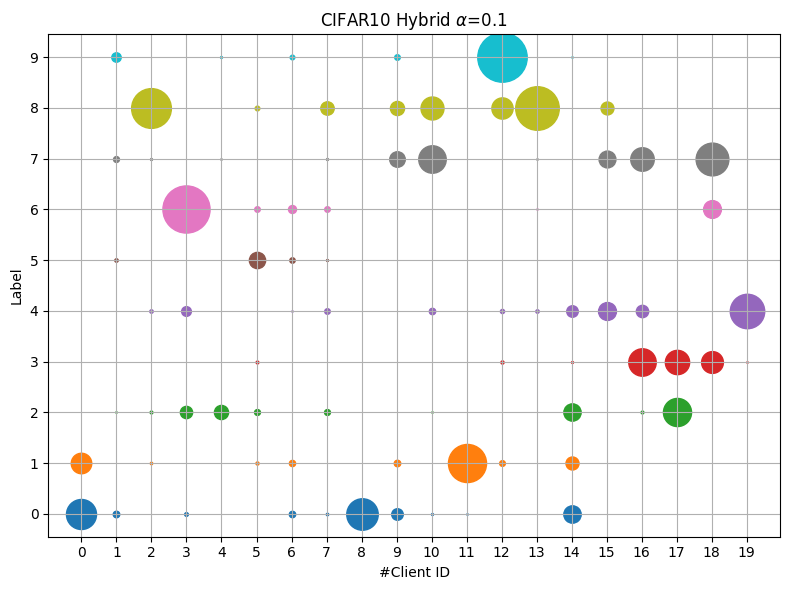

In [50]:
from fedlab.contrib.dataset.partitioned_cifar10 import PartitionedCIFAR10
dataset = PartitionedCIFAR10(root="./datasets/cifar10/",
                            path="./datasets/Dirichlet_cifar_{}".format(0.1),
                            dataname="cifar10",
                            num_clients=0,
                            preprocess=0,
                            balance=None,
                            partition="dirichlet",
                            dir_alpha=0.1)

num_classes = 10
num_clients = 20

plt.figure(figsize=(8,6), dpi=80)
plt.grid()
for x in range(num_clients):
    data = dataset.get_dataset(cid=x)
    labels = np.array(data.y)
    for l in range(num_classes):
        cnt = (labels==l).sum()
        #print(cnt)
        plt.scatter(x, l, s=cnt)

plt.yticks(range(num_classes))
plt.xticks(range(num_clients))
plt.ylabel("Label")
plt.xlabel("#Client ID")
plt.title(r"CIFAR10 Hybrid $\alpha$=0.1")

plt.tight_layout()
plt.savefig("./figures/cifar10_dirchlet01.pdf", bbox_inches='tight')

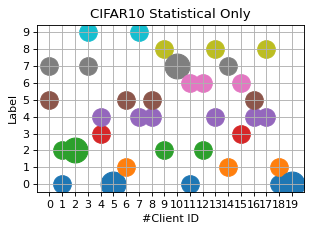

In [53]:
dataset = PartitionedCIFAR10(root="./datasets/cifar10/",
                            path="./datasets/pathological_cifar",
                            dataname="cifar10",
                            num_clients=100,
                            preprocess=0,
                            balance=None,
                            partition="shards",
                            num_shards=200)

num_classes = 10
num_clients = 20

plt.figure(figsize=(8,6), dpi=80)
plt.grid()
for x in range(num_clients):
    data = dataset.get_dataset(cid=x)
    labels = np.array(data.y)
    for l in range(num_classes):
        cnt = (labels==l).sum()
        #print(cnt)
        plt.scatter(x, l, s=cnt)

plt.yticks(range(num_classes))
plt.xticks(range(num_clients))
plt.ylabel("Label")
plt.xlabel("#Client ID")
plt.title(r"CIFAR10 Statistical Only")

plt.tight_layout()
plt.savefig("./figures/cifar10_pathlogical.pdf", bbox_inches='tight')

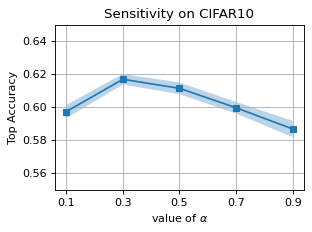

In [52]:
# def read_show(logs):
#     acc = np.array([max(read_event(log, "Test/accuracy/cifar10")) for log in logs])
#     print((acc.mean(), acc.std()))

# m1 = ["logs/cifar10_dirichlet_0.1_0/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.1_startup0_05-09-03:00:45/events.out.tfevents.1683572445.hit-v1.524338.0",
#       "logs/cifar10_dirichlet_0.1_0/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.1_startup0_05-09-06:43:55/events.out.tfevents.1683585835.hit-v1.1724049.0",
#       "logs/cifar10_dirichlet_0.1_0/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.1_startup0_05-08-23:17:33/events.out.tfevents.1683559053.hit-v1.3518991.0"]

# read_show(m1)

# m3 = ["logs/cifar10_dirichlet_0.1_0/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-09-03:00:45/events.out.tfevents.1683572445.hit-v1.524339.0",
#       "logs/cifar10_dirichlet_0.1_0/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-09-06:43:55/events.out.tfevents.1683585835.hit-v1.1724050.0",
#       "logs/cifar10_dirichlet_0.1_0/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-08-23:17:33/events.out.tfevents.1683559053.hit-v1.3518992.0"]

# read_show(m3)

# m5 = ["logs/cifar10_dirichlet_0.1_0/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup0_05-09-03:00:45/events.out.tfevents.1683572445.hit-v1.524340.0",
#       "logs/cifar10_dirichlet_0.1_0/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup0_05-09-06:43:55/events.out.tfevents.1683585835.hit-v1.1724051.0",
#       "logs/cifar10_dirichlet_0.1_0/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup0_05-08-23:17:32/events.out.tfevents.1683559052.hit-v1.3518993.0"]

# read_show(m5)

# m7 = ["logs/cifar10_dirichlet_0.1_0/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.7_startup0_05-09-03:00:45/events.out.tfevents.1683572445.hit-v1.524341.0",
#       "logs/cifar10_dirichlet_0.1_0/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.7_startup0_05-09-06:43:55/events.out.tfevents.1683585835.hit-v1.1724052.0",
#       "logs/cifar10_dirichlet_0.1_0/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.7_startup0_05-08-23:17:33/events.out.tfevents.1683559053.hit-v1.3518994.0"]

# read_show(m7)

# m9 = ["logs/cifar10_dirichlet_0.1_0/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.9_startup0_05-09-03:00:45/events.out.tfevents.1683572445.hit-v1.524342.0",
#       "logs/cifar10_dirichlet_0.1_0/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.9_startup0_05-09-06:43:55/events.out.tfevents.1683585835.hit-v1.1724053.0",
#       "logs/cifar10_dirichlet_0.1_0/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.9_startup0_05-08-23:17:33/events.out.tfevents.1683559053.hit-v1.3518995.0"]

# read_show(m9)

# (0.5973666707674662, 0.004033485740000992)
# (0.6169333259264628, 0.003185724784862392)
# (0.6114333271980286, 0.003564928214420838)
# (0.5996666749318441, 0.0035367971704127433)
# (0.5868333379427592, 0.004937170944527212)

y = np.array([0.5973666707674662, 0.6169333259264628, 0.6114333271980286, 0.5996666749318441, 0.5868333379427592])
std = np.array([0.004033485740000992, 0.003185724784862392, 0.003564928214420838, 0.0035367971704127433, 0.004937170944527212])
x = [0.1, 0.3, 0.5, 0.7, 0.9]

plt.figure(figsize=(4,3),dpi=80)
plt.ylim(0.55, 0.65)
plt.plot(x, y, markevery=1, marker="s")
plt.fill_between(x, y - std, y + std, alpha=0.3)
plt.xticks(x)
plt.xlabel(r"value of $\alpha$")
plt.ylabel("Top Accuracy")
plt.title("Sensitivity on CIFAR10")
plt.grid()

plt.tight_layout()
plt.savefig("./figures/sensitivity.pdf", bbox_inches='tight')

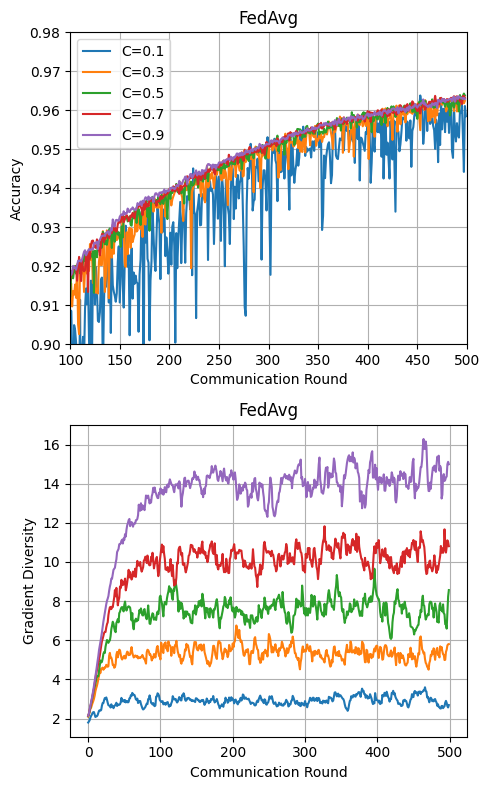

In [10]:
logs = ["logs/mnist_observation/Run42_N100_BS128_EP3_LLR0.1_K10_T500_H0/Setting_fedavg_GLR1.0_05-05-16:39:50/events.out.tfevents.1683275990.hit-v1.2858272.0",
        "logs/mnist_observation/Run42_N100_BS128_EP3_LLR0.1_K30_T500_H0/Setting_fedavg_GLR1.0_05-02-23:14:14/events.out.tfevents.1683040454.hit-v1.937025.0",
        "logs/mnist_observation/Run42_N100_BS128_EP3_LLR0.1_K50_T500_H0/Setting_fedavg_GLR1.0_05-02-23:14:14/events.out.tfevents.1683040454.hit-v1.937026.0",
        "logs/mnist_observation/Run42_N100_BS128_EP3_LLR0.1_K70_T500_H0/Setting_fedavg_GLR1.0_05-02-23:14:14/events.out.tfevents.1683040454.hit-v1.937027.0",
        "logs/mnist_observation/Run42_N100_BS128_EP3_LLR0.1_K90_T500_H0/Setting_fedavg_GLR1.0_05-02-23:14:14/events.out.tfevents.1683040454.hit-v1.937028.0"]

plt.figure(figsize=(5,8), dpi=100)

labels = ["C=0.1","C=0.3","C=0.5","C=0.7","C=0.9"]
for lb, log in zip(labels,logs):
    accuracy, diversity = read_event(log, "Test/accuracy/mnist"), read_event(log, "Metric/Diversity/mnist")
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(accuracy)), smooth(accuracy,0),label=lb)      
    plt.ylim(0.9,0.98)
    plt.xlim(100, 500)
    plt.ylabel("Accuracy")
    plt.xlabel("Communication Round")
    plt.title("FedAvg")
    plt.grid()
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(np.arange(len(diversity)), smooth(diversity, 0.8))
    plt.ylabel("Gradient Diversity")
    plt.xlabel("Communication Round")
    plt.title("FedAvg")
    plt.grid()

plt.tight_layout()
plt.savefig("./figures/observation.pdf", bbox_inches='tight')

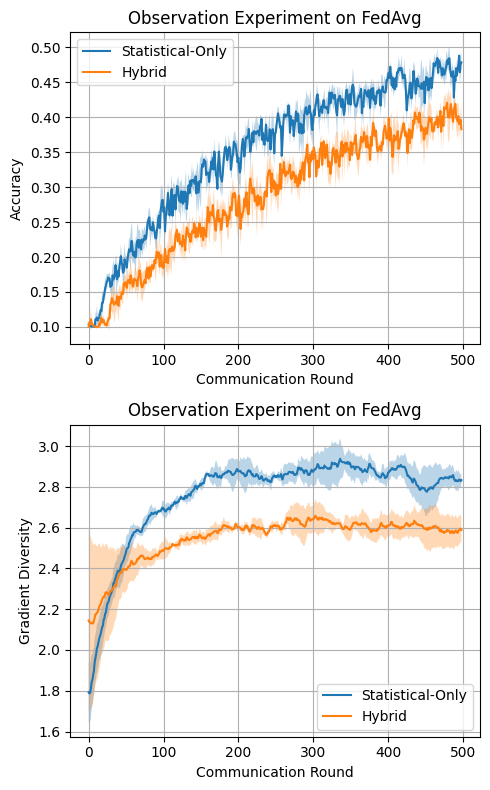

In [4]:
stats = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-02-12:58:24/events.out.tfevents.1683003504.hit-v1.1699677.0",
           "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-02-16:40:38/events.out.tfevents.1683016838.hit-v1.3606518.0",
           "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-02-10:59:11/events.out.tfevents.1682996351.hit-v1.743035.0"
           ]

hybird = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-02-00:07:27/events.out.tfevents.1682957247.hit-v1.1658849.0",
           "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-02-01:15:50/events.out.tfevents.1682961350.hit-v1.2388982.0",
           "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-01-21:46:22/events.out.tfevents.1682948782.hit-v1.112277.0"
           ]

logs = {"Statistical-Only":stats, "Hybrid":hybird}
plt.figure(figsize=(5,8), dpi=100)
ax = plt.subplot(2, 1, 1)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Communication Round")
ax.set_title("Observation Experiment on FedAvg")

ax.grid()

ax2 = plt.subplot(2, 1, 2)
ax2.set_ylabel("Gradient Diversity")
ax2.set_xlabel("Communication Round")
ax2.set_title("Observation Experiment on FedAvg")
ax2.grid()


for name, log in logs.items():
    data = [smooth(read_event(et, "Test/accuracy/cifar10"), 0.5)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
       
    ax.plot(np.arange(len(mean_data)), mean_data, label=name)
    ax.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
    
    data = [smooth(read_event(et, "Metric/Diversity/cifar10"), 0.98)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    
    ax2.plot(np.arange(len(mean_data)), mean_data,label=name)
    ax2.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)

ax.legend()
ax2.legend()


plt.tight_layout()
plt.savefig("./figures/observation.pdf", bbox_inches='tight')

statistical - FedAvg - acc 0.5240 - std 0.0047
statistical - FedNova - acc 0.5239 - std 0.0052
statistical - FedProx - acc 0.5238 - std 0.0051
statistical - SCAFFOLD - acc 0.4957 - std 0.0008
statistical - FedAvgM - acc 0.6122 - std 0.0023
statistical - FedYogi - acc 0.6107 - std 0.0151
statistical - FedAWARE - acc 0.6454 - std 0.0038
hybrid - FedAvg - acc 0.5047 - std 0.0020
hybrid - FedNova - acc 0.4539 - std 0.0032
hybrid - FedProx - acc 0.5068 - std 0.0058
hybrid - SCAFFOLD - acc 0.5061 - std 0.0034
hybrid - FedAvgM - acc 0.5813 - std 0.0097
hybrid - FedYogi - acc 0.5910 - std 0.0052
hybrid - FedAWARE - acc 0.6141 - std 0.0020
hybrid+ - FedAvg - acc 0.4610 - std 0.0019
hybrid+ - FedNova - acc 0.4098 - std 0.0150
hybrid+ - FedProx - acc 0.4711 - std 0.0038
hybrid+ - SCAFFOLD - acc 0.3136 - std 0.0280
hybrid+ - FedAvgM - acc 0.5683 - std 0.0075
hybrid+ - FedYogi - acc 0.5764 - std 0.0114
hybrid+ - FedAWARE - acc 0.6128 - std 0.0039


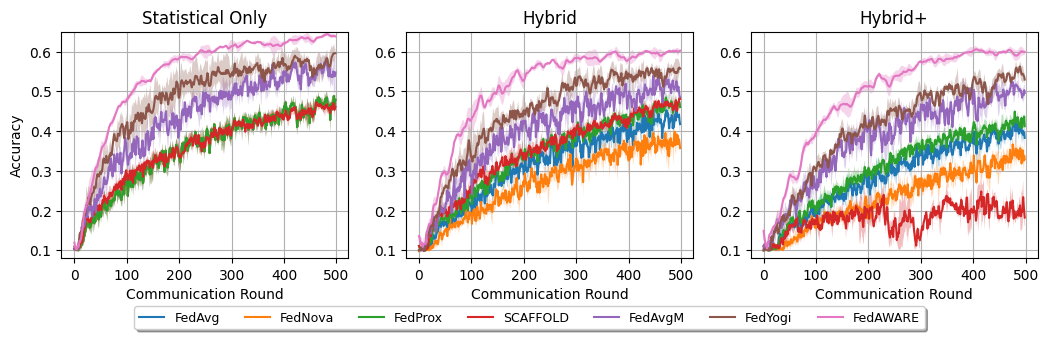

In [3]:
# dirchlet
key = "Test/accuracy/cifar10"
plt.figure(figsize = (12.6, 3), dpi=100)
smt = 0.5

fedavgs = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-02-12:58:24/events.out.tfevents.1683003504.hit-v1.1699677.0",
           "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-02-16:40:38/events.out.tfevents.1683016838.hit-v1.3606518.0",
           "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-02-10:59:11/events.out.tfevents.1682996351.hit-v1.743035.0"
           ]

fedavgms = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_05-02-12:58:24/events.out.tfevents.1683003504.hit-v1.1699678.0",
            "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_05-02-16:40:38/events.out.tfevents.1683016838.hit-v1.3606519.0",
            "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_05-02-10:59:11/events.out.tfevents.1682996351.hit-v1.743036.0"
            ]

fednovas = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-02-14:43:33/events.out.tfevents.1683009813.hit-v1.2641476.0",
            "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-02-16:40:37/events.out.tfevents.1683016837.hit-v1.3606522.0",
            "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-02-12:58:24/events.out.tfevents.1683003504.hit-v1.1699674.0"
            ]

fedyogis = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-02-14:43:33/events.out.tfevents.1683009813.hit-v1.2641477.0",
            "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-02-16:40:38/events.out.tfevents.1683016838.hit-v1.3606523.0",
            "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-02-12:58:24/events.out.tfevents.1683003504.hit-v1.1699675.0"]

fedproxs = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-02-14:43:33/events.out.tfevents.1683009813.hit-v1.2641474.0",
            "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-02-16:40:37/events.out.tfevents.1683016838.hit-v1.3606520.0",
            "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-02-10:59:10/events.out.tfevents.1682996350.hit-v1.743037.0"
            ]

scaffolds = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-02-14:43:33/events.out.tfevents.1683009813.hit-v1.2641475.0",
             "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-02-16:40:37/events.out.tfevents.1683016837.hit-v1.3606521.0",
             "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-02-10:59:11/events.out.tfevents.1682996351.hit-v1.743038.0"
             ]

ours = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-02-12:58:24/events.out.tfevents.1683003504.hit-v1.1699676.0",
        "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-02-14:43:33/events.out.tfevents.1683009813.hit-v1.2641478.0",
        "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-02-10:59:11/events.out.tfevents.1682996351.hit-v1.743034.0"
        ]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax = plt.subplot(1,3,1)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)

    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("statistical - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))
    
ax.grid()
ax.set_title("Statistical Only")
ax.set_ylim(0.08, 0.65)
ax.set_xlabel("Communication Round")
ax.set_ylabel("Accuracy")
# ax.legend()

smt = 0.5
#fig 2 

fedavgs = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_04-30-04:22:56/events.out.tfevents.1682799776.hit-v1.1137520.0",
           "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_04-30-06:01:37/events.out.tfevents.1682805697.hit-v1.1325055.0",
           "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_04-30-02:16:49/events.out.tfevents.1682792209.hit-v1.856681.0"
           ]

fedavgms = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_04-30-16:04:13/events.out.tfevents.1682841853.hit-v1.2842257.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_04-30-16:04:13/events.out.tfevents.1682841853.hit-v1.2842258.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_04-30-15:23:01/events.out.tfevents.1682839381.hit-v1.2636217.0"
            ]

fednovas = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_04-30-06:01:37/events.out.tfevents.1682805697.hit-v1.1325052.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_04-30-08:09:05/events.out.tfevents.1682813345.hit-v1.1598184.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_04-30-03:21:20/events.out.tfevents.1682796080.hit-v1.995486.0"
            ]

fedyogis = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_04-30-13:59:50/events.out.tfevents.1682834390.hit-v1.2406504.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_04-30-13:59:50/events.out.tfevents.1682834390.hit-v1.2406505.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_04-30-11:26:49/events.out.tfevents.1682825209.hit-v1.2051031.0"]

fedproxs = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_04-30-04:22:56/events.out.tfevents.1682799776.hit-v1.1137522.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_04-30-07:07:09/events.out.tfevents.1682809629.hit-v1.1470338.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_04-30-02:16:49/events.out.tfevents.1682792209.hit-v1.856683.0"
            ]

scaffolds = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_04-30-04:22:56/events.out.tfevents.1682799776.hit-v1.1137523.0",
             "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_04-30-07:07:09/events.out.tfevents.1682809629.hit-v1.1470339.0",
             "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_04-30-03:21:20/events.out.tfevents.1682796080.hit-v1.995485.0"
             ]

ours = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_04-30-04:22:56/events.out.tfevents.1682799776.hit-v1.1137519.0",
        "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_04-30-06:01:37/events.out.tfevents.1682805697.hit-v1.1325054.0",
        "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_04-30-02:16:49/events.out.tfevents.1682792209.hit-v1.856680.0"
        ]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax2 = plt.subplot(1,3,2)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax2.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax2.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("hybrid - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))

ax2.grid()
ax2.set_title("Hybrid")
ax2.set_ylim(0.08, 0.65)
ax2.set_xlabel("Communication Round")
#ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower center", bbox_to_anchor=(0.43, -0.34), fancybox=True, ncol=7, shadow=True, prop={"size":9})
# fig 3

fedavgs = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-02-00:07:27/events.out.tfevents.1682957247.hit-v1.1658849.0",
           "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-02-01:15:50/events.out.tfevents.1682961350.hit-v1.2388982.0",
           "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-01-21:46:22/events.out.tfevents.1682948782.hit-v1.112277.0"
           ]

fedavgms = ["logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_05-02-02:21:18/events.out.tfevents.1682965278.hit-v1.3161997.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_04-30-16:04:13/events.out.tfevents.1682841853.hit-v1.2842258.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_05-01-21:46:21/events.out.tfevents.1682948781.hit-v1.112278.0"
            ]

fednovas = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-02-01:15:50/events.out.tfevents.1682961350.hit-v1.2388979.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-02-03:11:36/events.out.tfevents.1682968296.hit-v1.3709013.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-01-22:50:07/events.out.tfevents.1682952607.hit-v1.865731.0"
            ]

fedyogis = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-02-01:15:50/events.out.tfevents.1682961350.hit-v1.2388980.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-02-03:11:36/events.out.tfevents.1682968296.hit-v1.3709014.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-01-22:50:07/events.out.tfevents.1682952607.hit-v1.865732.0"]

fedproxs = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.01_05-02-00:07:28/events.out.tfevents.1682957248.hit-v1.1658851.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.01_05-02-02:21:18/events.out.tfevents.1682965278.hit-v1.3161998.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.01_05-01-21:46:21/events.out.tfevents.1682948781.hit-v1.112279.0"
            ]

scaffolds = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-02-00:07:27/events.out.tfevents.1682957247.hit-v1.1658852.0",
             #"logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-02-02:21:18/events.out.tfevents.1682965278.hit-v1.3161999.0",
             "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-01-22:50:07/events.out.tfevents.1682952607.hit-v1.865730.0"
             ]

ours = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-01-22:50:07/events.out.tfevents.1682952607.hit-v1.865733.0",
        "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-02-01:15:50/events.out.tfevents.1682961350.hit-v1.2388981.0",
        "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-01-21:46:21/events.out.tfevents.1682948781.hit-v1.112276.0"
        ]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax3 = plt.subplot(1,3,3)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax3.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax3.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("hybrid+ - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))
ax3.grid()
ax3.set_ylim(0.08, 0.65)
ax3.set_xlabel("Communication Round")
#ax3.set_ylabel("Accuracy")
ax3.set_title("Hybrid+")
# ax3.legend()

#plt.tight_layout()
plt.savefig("./figures/accuracy_cifar10.pdf", bbox_inches='tight')

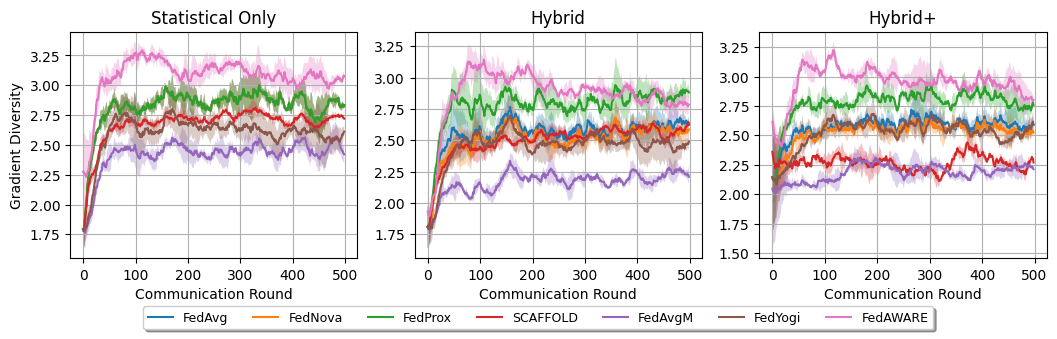

In [7]:
# dirchlet
key = "Metric/Diversity/cifar10"
plt.figure(figsize = (12.6, 3), dpi=100)
smt = 0.95

fedavgs = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-02-12:58:24/events.out.tfevents.1683003504.hit-v1.1699677.0",
           "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-02-16:40:38/events.out.tfevents.1683016838.hit-v1.3606518.0",
           "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-02-10:59:11/events.out.tfevents.1682996351.hit-v1.743035.0"
           ]

fedavgms = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_05-02-12:58:24/events.out.tfevents.1683003504.hit-v1.1699678.0",
            "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_05-02-16:40:38/events.out.tfevents.1683016838.hit-v1.3606519.0",
            "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_05-02-10:59:11/events.out.tfevents.1682996351.hit-v1.743036.0"
            ]

fednovas = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-02-14:43:33/events.out.tfevents.1683009813.hit-v1.2641476.0",
            "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-02-16:40:37/events.out.tfevents.1683016837.hit-v1.3606522.0",
            "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-02-12:58:24/events.out.tfevents.1683003504.hit-v1.1699674.0"
            ]

fedyogis = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-02-14:43:33/events.out.tfevents.1683009813.hit-v1.2641477.0",
            "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-02-16:40:38/events.out.tfevents.1683016838.hit-v1.3606523.0",
            "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-02-12:58:24/events.out.tfevents.1683003504.hit-v1.1699675.0"]

fedproxs = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-02-14:43:33/events.out.tfevents.1683009813.hit-v1.2641474.0",
            "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-02-16:40:37/events.out.tfevents.1683016838.hit-v1.3606520.0",
            "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-02-10:59:10/events.out.tfevents.1682996350.hit-v1.743037.0"
            ]

scaffolds = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-02-14:43:33/events.out.tfevents.1683009813.hit-v1.2641475.0",
             "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-02-16:40:37/events.out.tfevents.1683016837.hit-v1.3606521.0",
             "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-02-10:59:11/events.out.tfevents.1682996351.hit-v1.743038.0"
             ]

ours = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-02-12:58:24/events.out.tfevents.1683003504.hit-v1.1699676.0",
        "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-02-14:43:33/events.out.tfevents.1683009813.hit-v1.2641478.0",
        "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-02-10:59:11/events.out.tfevents.1682996351.hit-v1.743034.0"
        ]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax = plt.subplot(1,3,1)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
ax.grid()
ax.set_title("Statistical Only")
# ax.set_ylim(0.08, 0.65)
ax.set_xlabel("Communication Round")
ax.set_ylabel("Gradient Diversity")
# ax.legend()


#fig 2 

fedavgs = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_04-30-04:22:56/events.out.tfevents.1682799776.hit-v1.1137520.0",
           "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_04-30-06:01:37/events.out.tfevents.1682805697.hit-v1.1325055.0",
           "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_04-30-02:16:49/events.out.tfevents.1682792209.hit-v1.856681.0"
           ]

fedavgms = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_04-30-16:04:13/events.out.tfevents.1682841853.hit-v1.2842257.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_04-30-16:04:13/events.out.tfevents.1682841853.hit-v1.2842258.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_04-30-15:23:01/events.out.tfevents.1682839381.hit-v1.2636217.0"
            ]

fednovas = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_04-30-06:01:37/events.out.tfevents.1682805697.hit-v1.1325052.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_04-30-08:09:05/events.out.tfevents.1682813345.hit-v1.1598184.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_04-30-03:21:20/events.out.tfevents.1682796080.hit-v1.995486.0"
            ]

fedyogis = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_04-30-13:59:50/events.out.tfevents.1682834390.hit-v1.2406504.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_04-30-13:59:50/events.out.tfevents.1682834390.hit-v1.2406505.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_04-30-11:26:49/events.out.tfevents.1682825209.hit-v1.2051031.0"]

fedproxs = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_04-30-04:22:56/events.out.tfevents.1682799776.hit-v1.1137522.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_04-30-07:07:09/events.out.tfevents.1682809629.hit-v1.1470338.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_04-30-02:16:49/events.out.tfevents.1682792209.hit-v1.856683.0"
            ]

scaffolds = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_04-30-04:22:56/events.out.tfevents.1682799776.hit-v1.1137523.0",
             "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_04-30-07:07:09/events.out.tfevents.1682809629.hit-v1.1470339.0",
             "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_04-30-03:21:20/events.out.tfevents.1682796080.hit-v1.995485.0"
             ]

ours = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_04-30-04:22:56/events.out.tfevents.1682799776.hit-v1.1137519.0",
        "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_04-30-06:01:37/events.out.tfevents.1682805697.hit-v1.1325054.0",
        "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_04-30-02:16:49/events.out.tfevents.1682792209.hit-v1.856680.0"
        ]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax2 = plt.subplot(1,3,2)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax2.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax2.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
ax2.grid()
ax2.set_title("Hybrid")
# ax2.set_ylim(0.08, 0.65)
ax2.set_xlabel("Communication Round")
#ax2.set_ylabel("Gradient Diversity")
ax2.legend(loc="lower center", bbox_to_anchor=(0.43, -0.34), fancybox=True, ncol=7, shadow=True, prop={"size":9})
# fig 3

fedavgs = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-02-00:07:27/events.out.tfevents.1682957247.hit-v1.1658849.0",
           "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-02-01:15:50/events.out.tfevents.1682961350.hit-v1.2388982.0",
           "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-01-21:46:22/events.out.tfevents.1682948782.hit-v1.112277.0"
           ]

fedavgms = ["logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_05-02-02:21:18/events.out.tfevents.1682965278.hit-v1.3161997.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_04-30-16:04:13/events.out.tfevents.1682841853.hit-v1.2842258.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_05-01-21:46:21/events.out.tfevents.1682948781.hit-v1.112278.0"
            ]

fednovas = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-02-01:15:50/events.out.tfevents.1682961350.hit-v1.2388979.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-02-03:11:36/events.out.tfevents.1682968296.hit-v1.3709013.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-01-22:50:07/events.out.tfevents.1682952607.hit-v1.865731.0"
            ]

fedyogis = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-02-01:15:50/events.out.tfevents.1682961350.hit-v1.2388980.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-02-03:11:36/events.out.tfevents.1682968296.hit-v1.3709014.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-01-22:50:07/events.out.tfevents.1682952607.hit-v1.865732.0"]

fedproxs = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.01_05-02-00:07:28/events.out.tfevents.1682957248.hit-v1.1658851.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.01_05-02-02:21:18/events.out.tfevents.1682965278.hit-v1.3161998.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.01_05-01-21:46:21/events.out.tfevents.1682948781.hit-v1.112279.0"
            ]

scaffolds = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-02-00:07:27/events.out.tfevents.1682957247.hit-v1.1658852.0",
             #"logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-02-02:21:18/events.out.tfevents.1682965278.hit-v1.3161999.0",
             "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-01-22:50:07/events.out.tfevents.1682952607.hit-v1.865730.0"
             ]

ours = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-01-22:50:07/events.out.tfevents.1682952607.hit-v1.865733.0",
        "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-02-01:15:50/events.out.tfevents.1682961350.hit-v1.2388981.0",
        "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-01-21:46:21/events.out.tfevents.1682948781.hit-v1.112276.0"
        ]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax3 = plt.subplot(1,3,3)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax3.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax3.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
ax3.grid()
# ax3.set_ylim(0.08, 0.65)
ax3.set_xlabel("Communication Round")
#ax3.set_ylabel("Gradient Diversity")
ax3.set_title("Hybrid+")
# ax3.legend()

#plt.tight_layout()
plt.savefig("./figures/diversity_cifar10.pdf", bbox_inches='tight')

statistical - FedAvg - acc 2.1206 - std 0.0774
statistical - FedNova - acc 2.1206 - std 0.0774
statistical - FedProx - acc 2.1210 - std 0.0772
statistical - SCAFFOLD - acc 2.1206 - std 0.0774
statistical - FedAvgM - acc 2.1206 - std 0.0774
statistical - FedYogi - acc 2.2251 - std 0.2123
statistical - FedAWARE - acc 2.1289 - std 0.0864
hybrid - FedAvg - acc 2.0439 - std 0.1099
hybrid - FedNova - acc 2.0439 - std 0.1099
hybrid - FedProx - acc 2.0444 - std 0.1097
hybrid - SCAFFOLD - acc 2.0439 - std 0.1099
hybrid - FedAvgM - acc 2.0439 - std 0.1099
hybrid - FedYogi - acc 2.0439 - std 0.1099
hybrid - FedAWARE - acc 1.6798 - std 0.1155
hybrid+ - FedAvg - acc 2.0758 - std 0.2339
hybrid+ - FedNova - acc 2.1485 - std 0.1374
hybrid+ - FedProx - acc 2.0761 - std 0.2336
hybrid+ - SCAFFOLD - acc 2.2490 - std 0.0257
hybrid+ - FedAvgM - acc 1.9681 - std 0.2148
hybrid+ - FedYogi - acc 2.3746 - std 0.1125
hybrid+ - FedAWARE - acc 2.1346 - std 0.0823


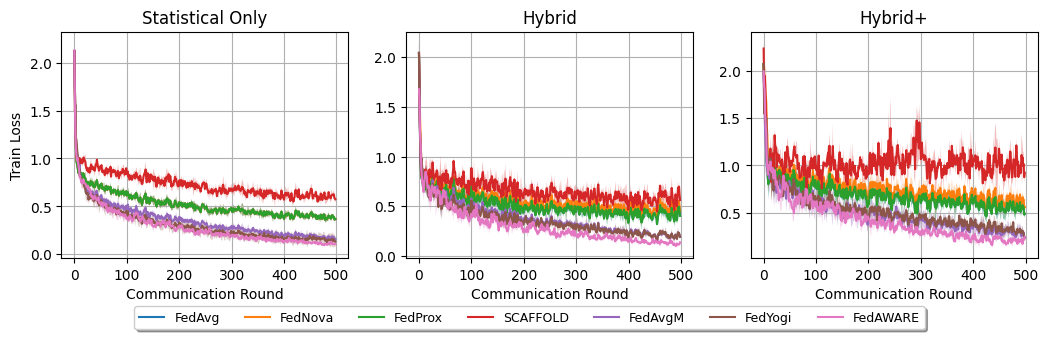

In [11]:
# dirchlet
key = "Train/loss/cifar10"
plt.figure(figsize = (12.6, 3), dpi=100)
smt = 0.5

fedavgs = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-02-12:58:24/events.out.tfevents.1683003504.hit-v1.1699677.0",
           "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-02-16:40:38/events.out.tfevents.1683016838.hit-v1.3606518.0",
           "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-02-10:59:11/events.out.tfevents.1682996351.hit-v1.743035.0"
           ]

fedavgms = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_05-02-12:58:24/events.out.tfevents.1683003504.hit-v1.1699678.0",
            "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_05-02-16:40:38/events.out.tfevents.1683016838.hit-v1.3606519.0",
            "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_05-02-10:59:11/events.out.tfevents.1682996351.hit-v1.743036.0"
            ]

fednovas = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-02-14:43:33/events.out.tfevents.1683009813.hit-v1.2641476.0",
            "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-02-16:40:37/events.out.tfevents.1683016837.hit-v1.3606522.0",
            "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-02-12:58:24/events.out.tfevents.1683003504.hit-v1.1699674.0"
            ]

fedyogis = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-02-14:43:33/events.out.tfevents.1683009813.hit-v1.2641477.0",
            "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-02-16:40:38/events.out.tfevents.1683016838.hit-v1.3606523.0",
            "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-02-12:58:24/events.out.tfevents.1683003504.hit-v1.1699675.0"]

fedproxs = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-02-14:43:33/events.out.tfevents.1683009813.hit-v1.2641474.0",
            "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-02-16:40:37/events.out.tfevents.1683016838.hit-v1.3606520.0",
            "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-02-10:59:10/events.out.tfevents.1682996350.hit-v1.743037.0"
            ]

scaffolds = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-02-14:43:33/events.out.tfevents.1683009813.hit-v1.2641475.0",
             "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-02-16:40:37/events.out.tfevents.1683016837.hit-v1.3606521.0",
             "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-02-10:59:11/events.out.tfevents.1682996351.hit-v1.743038.0"
             ]

ours = ["logs/cifar10_pathological_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-02-12:58:24/events.out.tfevents.1683003504.hit-v1.1699676.0",
        "logs/cifar10_pathological_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-02-14:43:33/events.out.tfevents.1683009813.hit-v1.2641478.0",
        "logs/cifar10_pathological_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-02-10:59:11/events.out.tfevents.1682996351.hit-v1.743034.0"
        ]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax = plt.subplot(1,3,1)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)

    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("statistical - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))
    
ax.grid()
ax.set_title("Statistical Only")
# ax.set_ylim(0.08, 0.65)
ax.set_xlabel("Communication Round")
ax.set_ylabel("Train Loss")
# ax.legend()

#fig 2 

fedavgs = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_04-30-04:22:56/events.out.tfevents.1682799776.hit-v1.1137520.0",
           "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_04-30-06:01:37/events.out.tfevents.1682805697.hit-v1.1325055.0",
           "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_04-30-02:16:49/events.out.tfevents.1682792209.hit-v1.856681.0"
           ]

fedavgms = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_04-30-16:04:13/events.out.tfevents.1682841853.hit-v1.2842257.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_04-30-16:04:13/events.out.tfevents.1682841853.hit-v1.2842258.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_04-30-15:23:01/events.out.tfevents.1682839381.hit-v1.2636217.0"
            ]

fednovas = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_04-30-06:01:37/events.out.tfevents.1682805697.hit-v1.1325052.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_04-30-08:09:05/events.out.tfevents.1682813345.hit-v1.1598184.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_04-30-03:21:20/events.out.tfevents.1682796080.hit-v1.995486.0"
            ]

fedyogis = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_04-30-13:59:50/events.out.tfevents.1682834390.hit-v1.2406504.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_04-30-13:59:50/events.out.tfevents.1682834390.hit-v1.2406505.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_04-30-11:26:49/events.out.tfevents.1682825209.hit-v1.2051031.0"]

fedproxs = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_04-30-04:22:56/events.out.tfevents.1682799776.hit-v1.1137522.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_04-30-07:07:09/events.out.tfevents.1682809629.hit-v1.1470338.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_04-30-02:16:49/events.out.tfevents.1682792209.hit-v1.856683.0"
            ]

scaffolds = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_04-30-04:22:56/events.out.tfevents.1682799776.hit-v1.1137523.0",
             "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_04-30-07:07:09/events.out.tfevents.1682809629.hit-v1.1470339.0",
             "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_04-30-03:21:20/events.out.tfevents.1682796080.hit-v1.995485.0"
             ]

ours = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_04-30-04:22:56/events.out.tfevents.1682799776.hit-v1.1137519.0",
        "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_04-30-06:01:37/events.out.tfevents.1682805697.hit-v1.1325054.0",
        "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_04-30-02:16:49/events.out.tfevents.1682792209.hit-v1.856680.0"
        ]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax2 = plt.subplot(1,3,2)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax2.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax2.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("hybrid - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))

ax2.grid()
ax2.set_title("Hybrid")
#ax2.set_ylim(0.08, 0.65)
ax2.set_xlabel("Communication Round")
#ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower center", bbox_to_anchor=(0.43, -0.34), fancybox=True, ncol=7, shadow=True, prop={"size":9})
# fig 3

fedavgs = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-02-00:07:27/events.out.tfevents.1682957247.hit-v1.1658849.0",
           "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-02-01:15:50/events.out.tfevents.1682961350.hit-v1.2388982.0",
           "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-01-21:46:22/events.out.tfevents.1682948782.hit-v1.112277.0"
           ]

fedavgms = ["logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_05-02-02:21:18/events.out.tfevents.1682965278.hit-v1.3161997.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_04-30-16:04:13/events.out.tfevents.1682841853.hit-v1.2842258.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_05-01-21:46:21/events.out.tfevents.1682948781.hit-v1.112278.0"
            ]

fednovas = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-02-01:15:50/events.out.tfevents.1682961350.hit-v1.2388979.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-02-03:11:36/events.out.tfevents.1682968296.hit-v1.3709013.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-01-22:50:07/events.out.tfevents.1682952607.hit-v1.865731.0"
            ]

fedyogis = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-02-01:15:50/events.out.tfevents.1682961350.hit-v1.2388980.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-02-03:11:36/events.out.tfevents.1682968296.hit-v1.3709014.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-01-22:50:07/events.out.tfevents.1682952607.hit-v1.865732.0"]

fedproxs = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.01_05-02-00:07:28/events.out.tfevents.1682957248.hit-v1.1658851.0",
            "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.01_05-02-02:21:18/events.out.tfevents.1682965278.hit-v1.3161998.0",
            "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.01_05-01-21:46:21/events.out.tfevents.1682948781.hit-v1.112279.0"
            ]

scaffolds = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-02-00:07:27/events.out.tfevents.1682957247.hit-v1.1658852.0",
             #"logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-02-02:21:18/events.out.tfevents.1682965278.hit-v1.3161999.0",
             "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-01-22:50:07/events.out.tfevents.1682952607.hit-v1.865730.0"
             ]

ours = ["logs/cifar10_dirichlet_0.1_37/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-01-22:50:07/events.out.tfevents.1682952607.hit-v1.865733.0",
        "logs/cifar10_dirichlet_0.1_37/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-02-01:15:50/events.out.tfevents.1682961350.hit-v1.2388981.0",
        "logs/cifar10_dirichlet_0.1_37/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-01-21:46:21/events.out.tfevents.1682948781.hit-v1.112276.0"
        ]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax3 = plt.subplot(1,3,3)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax3.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax3.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("hybrid+ - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))
ax3.grid()
#ax3.set_ylim(0.08, 0.65)
ax3.set_xlabel("Communication Round")
#ax3.set_ylabel("Accuracy")
ax3.set_title("Hybrid+")
# ax3.legend()

#plt.tight_layout()
plt.savefig("./figures/trainloss_cifar10.pdf", bbox_inches='tight')

# MNIST

statistical - FedAvg - acc 0.9012 - std 0.0019
statistical - FedNova - acc 0.9012 - std 0.0019
statistical - FedProx - acc 0.9012 - std 0.0020
statistical - SCAFFOLD - acc 0.9474 - std 0.0015
statistical - FedAvgM - acc 0.9310 - std 0.0013
statistical - FedYogi - acc 0.9715 - std 0.0010
statistical - FedAWARE - acc 0.9660 - std 0.0009
hybrid - FedAvg - acc 0.9075 - std 0.0022
hybrid - FedNova - acc 0.8950 - std 0.0032
hybrid - FedProx - acc 0.9080 - std 0.0031
hybrid - SCAFFOLD - acc 0.9491 - std 0.0011
hybrid - FedAvgM - acc 0.9425 - std 0.0042
hybrid - FedYogi - acc 0.9749 - std 0.0008
hybrid - FedAWARE - acc 0.9696 - std 0.0004
hybrid+ - FedAvg - acc 0.8951 - std 0.0009
hybrid+ - FedNova - acc 0.8862 - std 0.0005
hybrid+ - FedProx - acc 0.8982 - std 0.0003
hybrid+ - SCAFFOLD - acc 0.9203 - std 0.0004
hybrid+ - FedAvgM - acc 0.9315 - std 0.0014
hybrid+ - FedYogi - acc 0.9738 - std 0.0003
hybrid+ - FedAWARE - acc 0.9671 - std 0.0014


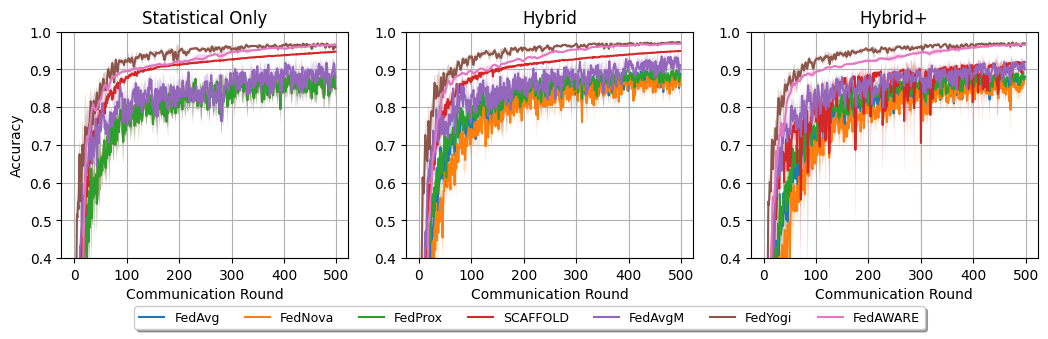

In [4]:
# dirchlet
key = "Test/accuracy/mnist"
plt.figure(figsize = (12.6, 3), dpi=100)
smt = 0

fedavgs = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-05-17:25:13/events.out.tfevents.1683278713.hit-v1.2940704.0",
           "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-05-17:52:58/events.out.tfevents.1683280378.hit-v1.2989208.0",
           "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-05-15:17:21/events.out.tfevents.1683271041.hit-v1.2692601.0"
           ]

fedavgms = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-05-17:25:13/events.out.tfevents.1683278713.hit-v1.2940705.0",
            "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-05-18:15:30/events.out.tfevents.1683281730.hit-v1.3039624.0",
            "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-05-15:17:21/events.out.tfevents.1683271041.hit-v1.2692602.0"
            ]

fednovas = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-05-17:52:58/events.out.tfevents.1683280378.hit-v1.2989205.0",
            "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-05-18:15:30/events.out.tfevents.1683281730.hit-v1.3039627.0",
            "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-05-16:50:22/events.out.tfevents.1683276622.hit-v1.2877906.0"
            ]

fedyogis = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-05-17:52:58/events.out.tfevents.1683280378.hit-v1.2989206.0",
            "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-05-18:15:30/events.out.tfevents.1683281730.hit-v1.3039628.0",
            "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-05-15:17:21/events.out.tfevents.1683271041.hit-v1.2692603.0"]

fedproxs = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-05-17:25:13/events.out.tfevents.1683278713.hit-v1.2940706.0",
            "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-05-18:15:30/events.out.tfevents.1683281730.hit-v1.3039625.0",
            "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-05-16:50:22/events.out.tfevents.1683276622.hit-v1.2877904.0"
            ]

scaffolds = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-05-17:25:13/events.out.tfevents.1683278713.hit-v1.2940707.0",
             "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-05-18:15:30/events.out.tfevents.1683281730.hit-v1.3039626.0",
             "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-05-16:50:22/events.out.tfevents.1683276622.hit-v1.2877905.0"
             ]

# ours = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-05-16:50:22/events.out.tfevents.1683276622.hit-v1.2877907.0",
#         "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-05-17:52:58/events.out.tfevents.1683280378.hit-v1.2989207.0",
#         "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-05-15:17:21/events.out.tfevents.1683271041.hit-v1.2692600.0"
#         ]

ours = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-00:16:44/events.out.tfevents.1684340204.hit-v1.1343343.0",
        "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-00:16:44/events.out.tfevents.1684340204.hit-v1.1343344.0",
        "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-00:16:44/events.out.tfevents.1684340204.hit-v1.1343342.0"]

logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax = plt.subplot(1,3,1)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)

    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("statistical - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))
    
ax.grid()
ax.set_title("Statistical Only")
ax.set_ylim(0.4, 1)
ax.set_xlabel("Communication Round")
ax.set_ylabel("Accuracy")
# ax.legend()


#fig 2 

fedavgs = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-06-03:47:26/events.out.tfevents.1683316046.hit-v1.4068492.0",
           "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-06-04:59:29/events.out.tfevents.1683320369.hit-v1.19598.0",
           "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-06-02:58:48/events.out.tfevents.1683313128.hit-v1.3981719.0"
           ]

fedavgms = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-06-04:16:59/events.out.tfevents.1683317819.hit-v1.4130855.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-06-04:59:29/events.out.tfevents.1683320369.hit-v1.19599.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-06-02:58:48/events.out.tfevents.1683313128.hit-v1.3981720.0"
            ]

fednovas = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-06-04:16:59/events.out.tfevents.1683317819.hit-v1.4130858.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-06-05:27:01/events.out.tfevents.1683322021.hit-v1.64718.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-06-03:47:26/events.out.tfevents.1683316046.hit-v1.4068489.0"
            ]

fedyogis = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-06-04:16:59/events.out.tfevents.1683317819.hit-v1.4130859.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-06-05:27:01/events.out.tfevents.1683322021.hit-v1.64719.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-06-03:47:26/events.out.tfevents.1683316046.hit-v1.4068490.0"]

fedproxs = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-06-04:16:59/events.out.tfevents.1683317819.hit-v1.4130856.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-06-05:27:01/events.out.tfevents.1683322021.hit-v1.64716.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-06-02:58:48/events.out.tfevents.1683313128.hit-v1.3981721.0"
            ]

scaffolds = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-06-04:16:59/events.out.tfevents.1683317819.hit-v1.4130857.0",
             "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-06-05:27:01/events.out.tfevents.1683322021.hit-v1.64717.0",
             "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-06-02:58:48/events.out.tfevents.1683313128.hit-v1.3981722.0"
             ]

# ours = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-06-03:47:26/events.out.tfevents.1683316046.hit-v1.4068491.0",
#         "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-06-04:59:29/events.out.tfevents.1683320369.hit-v1.19597.0",
#         "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-06-02:58:48/events.out.tfevents.1683313128.hit-v1.3981718.0"
#         ]

ours = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-17-19:56:44/events.out.tfevents.1684324604.hit-v1.1006046.0",
        "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-17-19:56:44/events.out.tfevents.1684324604.hit-v1.1006047.0",
        "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-17-19:56:44/events.out.tfevents.1684324604.hit-v1.1006045.0"]

logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax2 = plt.subplot(1,3,2)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax2.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax2.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("hybrid - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))

ax2.grid()
ax2.set_title("Hybrid")
ax2.set_ylim(0.4, 1)
ax2.set_xlabel("Communication Round")
#ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower center", bbox_to_anchor=(0.43, -0.34), fancybox=True, ncol=7, shadow=True, prop={"size":9})
# fig 3

fedavgs = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-05-23:47:51/events.out.tfevents.1683301671.hit-v1.3614092.0",
           "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-06-00:53:27/events.out.tfevents.1683305607.hit-v1.3762976.0",
           "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-05-23:07:31/events.out.tfevents.1683299251.hit-v1.3534969.0"
           ]

fedavgms = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-06-00:17:11/events.out.tfevents.1683303431.hit-v1.3685351.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-06-00:53:27/events.out.tfevents.1683305607.hit-v1.3762977.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-05-23:07:31/events.out.tfevents.1683299251.hit-v1.3534970.0"
            ]

fednovas = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-06-00:17:11/events.out.tfevents.1683303431.hit-v1.3685354.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-06-01:21:15/events.out.tfevents.1683307275.hit-v1.3808672.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-05-23:47:52/events.out.tfevents.1683301672.hit-v1.3614089.0"
            ]

fedyogis = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-06-00:17:11/events.out.tfevents.1683303431.hit-v1.3685355.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-06-01:21:15/events.out.tfevents.1683307275.hit-v1.3808673.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-05-23:47:51/events.out.tfevents.1683301671.hit-v1.3614090.0"]

fedproxs = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-06-00:17:11/events.out.tfevents.1683303431.hit-v1.3685352.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-06-01:21:15/events.out.tfevents.1683307275.hit-v1.3808670.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-05-23:07:31/events.out.tfevents.1683299251.hit-v1.3534971.0"
            ]

scaffolds = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-06-00:17:11/events.out.tfevents.1683303431.hit-v1.3685353.0",
             "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-06-01:21:15/events.out.tfevents.1683307275.hit-v1.3808671.0",
             "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-05-23:07:31/events.out.tfevents.1683299251.hit-v1.3534972.0"
             ]

# ours = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-05-23:47:51/events.out.tfevents.1683301671.hit-v1.3614091.0",
#         "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-06-00:53:27/events.out.tfevents.1683305607.hit-v1.3762975.0",
#         "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-05-23:07:31/events.out.tfevents.1683299251.hit-v1.3534968.0"
#         ]

ours = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-04:29:21/events.out.tfevents.1684355361.hit-v1.1591655.0",
        "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-04:29:22/events.out.tfevents.1684355362.hit-v1.1591656.0",
        "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-04:29:21/events.out.tfevents.1684355361.hit-v1.1591654.0"]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax3 = plt.subplot(1,3,3)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax3.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax3.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("hybrid+ - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))
ax3.grid()
ax3.set_ylim(0.4, 1)
ax3.set_xlabel("Communication Round")
#ax3.set_ylabel("Accuracy")
ax3.set_title("Hybrid+")
# ax3.legend()

#plt.tight_layout()
plt.savefig("./figures/accuracy_mnist.pdf", bbox_inches='tight')

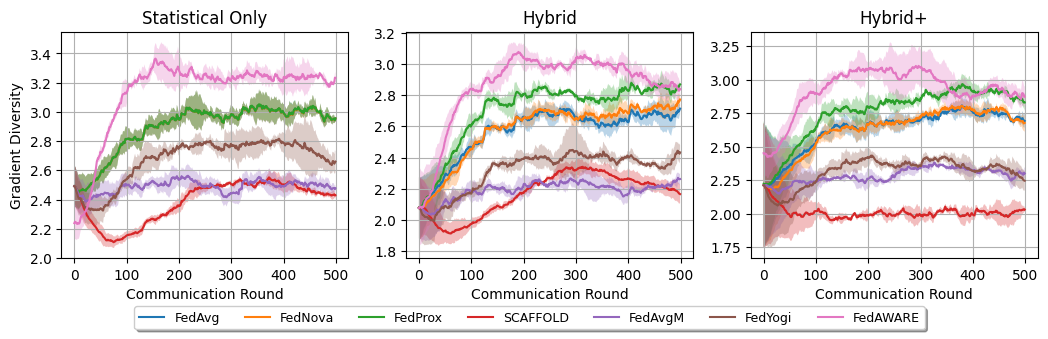

In [6]:
# dirchlet
key = "Metric/Diversity/mnist"
plt.figure(figsize = (12.6, 3), dpi=100)
smt = 0.98

fedavgs = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-05-17:25:13/events.out.tfevents.1683278713.hit-v1.2940704.0",
           "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-05-17:52:58/events.out.tfevents.1683280378.hit-v1.2989208.0",
           "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-05-15:17:21/events.out.tfevents.1683271041.hit-v1.2692601.0"
           ]

fedavgms = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-05-17:25:13/events.out.tfevents.1683278713.hit-v1.2940705.0",
            "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-05-18:15:30/events.out.tfevents.1683281730.hit-v1.3039624.0",
            "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-05-15:17:21/events.out.tfevents.1683271041.hit-v1.2692602.0"
            ]

fednovas = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-05-17:52:58/events.out.tfevents.1683280378.hit-v1.2989205.0",
            "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-05-18:15:30/events.out.tfevents.1683281730.hit-v1.3039627.0",
            "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-05-16:50:22/events.out.tfevents.1683276622.hit-v1.2877906.0"
            ]

fedyogis = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-05-17:52:58/events.out.tfevents.1683280378.hit-v1.2989206.0",
            "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-05-18:15:30/events.out.tfevents.1683281730.hit-v1.3039628.0",
            "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-05-15:17:21/events.out.tfevents.1683271041.hit-v1.2692603.0"]

fedproxs = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-05-17:25:13/events.out.tfevents.1683278713.hit-v1.2940706.0",
            "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-05-18:15:30/events.out.tfevents.1683281730.hit-v1.3039625.0",
            "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-05-16:50:22/events.out.tfevents.1683276622.hit-v1.2877904.0"
            ]

scaffolds = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-05-17:25:13/events.out.tfevents.1683278713.hit-v1.2940707.0",
             "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-05-18:15:30/events.out.tfevents.1683281730.hit-v1.3039626.0",
             "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-05-16:50:22/events.out.tfevents.1683276622.hit-v1.2877905.0"
             ]

# ours = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-05-16:50:22/events.out.tfevents.1683276622.hit-v1.2877907.0",
#         "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-05-17:52:58/events.out.tfevents.1683280378.hit-v1.2989207.0",
#         "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-05-15:17:21/events.out.tfevents.1683271041.hit-v1.2692600.0"
#         ]

ours = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-00:16:44/events.out.tfevents.1684340204.hit-v1.1343343.0",
        "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-00:16:44/events.out.tfevents.1684340204.hit-v1.1343344.0",
        "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-00:16:44/events.out.tfevents.1684340204.hit-v1.1343342.0"]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax = plt.subplot(1,3,1)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt) for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
ax.grid()
ax.set_title("Statistical Only")
# ax.set_ylim(0.08, 0.65)
ax.set_xlabel("Communication Round")
ax.set_ylabel("Gradient Diversity")
# ax.legend()


#fig 2 

fedavgs = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-06-03:47:26/events.out.tfevents.1683316046.hit-v1.4068492.0",
           "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-06-04:59:29/events.out.tfevents.1683320369.hit-v1.19598.0",
           "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-06-02:58:48/events.out.tfevents.1683313128.hit-v1.3981719.0"
           ]

fedavgms = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-06-04:16:59/events.out.tfevents.1683317819.hit-v1.4130855.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-06-04:59:29/events.out.tfevents.1683320369.hit-v1.19599.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-06-02:58:48/events.out.tfevents.1683313128.hit-v1.3981720.0"
            ]

fednovas = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-06-04:16:59/events.out.tfevents.1683317819.hit-v1.4130858.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-06-05:27:01/events.out.tfevents.1683322021.hit-v1.64718.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-06-03:47:26/events.out.tfevents.1683316046.hit-v1.4068489.0"
            ]

fedyogis = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-06-04:16:59/events.out.tfevents.1683317819.hit-v1.4130859.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-06-05:27:01/events.out.tfevents.1683322021.hit-v1.64719.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-06-03:47:26/events.out.tfevents.1683316046.hit-v1.4068490.0"]

fedproxs = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-06-04:16:59/events.out.tfevents.1683317819.hit-v1.4130856.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-06-05:27:01/events.out.tfevents.1683322021.hit-v1.64716.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-06-02:58:48/events.out.tfevents.1683313128.hit-v1.3981721.0"
            ]

scaffolds = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-06-04:16:59/events.out.tfevents.1683317819.hit-v1.4130857.0",
             "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-06-05:27:01/events.out.tfevents.1683322021.hit-v1.64717.0",
             "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-06-02:58:48/events.out.tfevents.1683313128.hit-v1.3981722.0"
             ]

# ours = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-06-03:47:26/events.out.tfevents.1683316046.hit-v1.4068491.0",
#         "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-06-04:59:29/events.out.tfevents.1683320369.hit-v1.19597.0",
#         "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-06-02:58:48/events.out.tfevents.1683313128.hit-v1.3981718.0"
#         ]

ours = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-17-19:56:44/events.out.tfevents.1684324604.hit-v1.1006046.0",
        "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-17-19:56:44/events.out.tfevents.1684324604.hit-v1.1006047.0",
        "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-17-19:56:44/events.out.tfevents.1684324604.hit-v1.1006045.0"]



logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax2 = plt.subplot(1,3,2)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt) for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax2.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax2.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
ax2.grid()
ax2.set_title("Hybrid")
# ax2.set_ylim(0.08, 0.65)
ax2.set_xlabel("Communication Round")
#ax2.set_ylabel("Gradient Diversity")
ax2.legend(loc="lower center", bbox_to_anchor=(0.43, -0.34), fancybox=True, ncol=7, shadow=True, prop={"size":9})
# fig 3

fedavgs = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-05-23:47:51/events.out.tfevents.1683301671.hit-v1.3614092.0",
           "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-06-00:53:27/events.out.tfevents.1683305607.hit-v1.3762976.0",
           "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-05-23:07:31/events.out.tfevents.1683299251.hit-v1.3534969.0"
           ]

fedavgms = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-06-00:17:11/events.out.tfevents.1683303431.hit-v1.3685351.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-06-00:53:27/events.out.tfevents.1683305607.hit-v1.3762977.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-05-23:07:31/events.out.tfevents.1683299251.hit-v1.3534970.0"
            ]

fednovas = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-06-00:17:11/events.out.tfevents.1683303431.hit-v1.3685354.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-06-01:21:15/events.out.tfevents.1683307275.hit-v1.3808672.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-05-23:47:52/events.out.tfevents.1683301672.hit-v1.3614089.0"
            ]

fedyogis = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-06-00:17:11/events.out.tfevents.1683303431.hit-v1.3685355.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-06-01:21:15/events.out.tfevents.1683307275.hit-v1.3808673.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-05-23:47:51/events.out.tfevents.1683301671.hit-v1.3614090.0"]

fedproxs = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-06-00:17:11/events.out.tfevents.1683303431.hit-v1.3685352.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-06-01:21:15/events.out.tfevents.1683307275.hit-v1.3808670.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-05-23:07:31/events.out.tfevents.1683299251.hit-v1.3534971.0"
            ]

scaffolds = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-06-00:17:11/events.out.tfevents.1683303431.hit-v1.3685353.0",
             "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-06-01:21:15/events.out.tfevents.1683307275.hit-v1.3808671.0",
             "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-05-23:07:31/events.out.tfevents.1683299251.hit-v1.3534972.0"
             ]

# ours = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-05-23:47:51/events.out.tfevents.1683301671.hit-v1.3614091.0",
#         "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-06-00:53:27/events.out.tfevents.1683305607.hit-v1.3762975.0",
#         "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-05-23:07:31/events.out.tfevents.1683299251.hit-v1.3534968.0"
#         ]

ours = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-04:29:21/events.out.tfevents.1684355361.hit-v1.1591655.0",
        "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-04:29:22/events.out.tfevents.1684355362.hit-v1.1591656.0",
        "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-04:29:21/events.out.tfevents.1684355361.hit-v1.1591654.0"]

logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax3 = plt.subplot(1,3,3)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt) for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax3.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax3.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
ax3.grid()
# ax3.set_ylim(0.08, 0.65)
ax3.set_xlabel("Communication Round")
#ax3.set_ylabel("Gradient Diversity")
ax3.set_title("Hybrid+")
# ax3.legend()

#plt.tight_layout()
plt.savefig("./figures/diversity_mnist.pdf", bbox_inches='tight')

statistical - FedAvg - acc 2.1036 - std 0.0540
statistical - FedNova - acc 2.1036 - std 0.0540
statistical - FedProx - acc 2.1040 - std 0.0539
statistical - SCAFFOLD - acc 2.1036 - std 0.0540
statistical - FedAvgM - acc 2.1036 - std 0.0540
statistical - FedYogi - acc 2.1036 - std 0.0540
statistical - FedAWARE - acc 2.0875 - std 0.0542
hybrid - FedAvg - acc 1.9451 - std 0.0935
hybrid - FedNova - acc 1.9451 - std 0.0935
hybrid - FedProx - acc 1.9549 - std 0.0916
hybrid - SCAFFOLD - acc 1.9451 - std 0.0935
hybrid - FedAvgM - acc 1.9451 - std 0.0935
hybrid - FedYogi - acc 1.9451 - std 0.0935
hybrid - FedAWARE - acc 2.1075 - std 0.0582
hybrid+ - FedAvg - acc 2.2252 - std 0.0278
hybrid+ - FedNova - acc 2.2295 - std 0.0261
hybrid+ - FedProx - acc 2.2240 - std 0.0244
hybrid+ - SCAFFOLD - acc 2.2281 - std 0.0258
hybrid+ - FedAvgM - acc 2.2252 - std 0.0278
hybrid+ - FedYogi - acc 2.2092 - std 0.0052
hybrid+ - FedAWARE - acc 2.2494 - std 0.0134


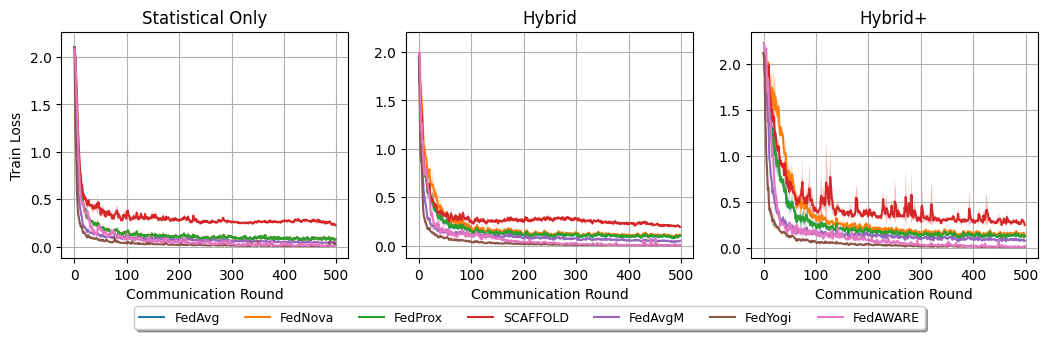

In [7]:
# dirchlet
key = "Train/loss/mnist"
plt.figure(figsize = (12.6, 3), dpi=100)
smt = 0.5

fedavgs = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-05-17:25:13/events.out.tfevents.1683278713.hit-v1.2940704.0",
           "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-05-17:52:58/events.out.tfevents.1683280378.hit-v1.2989208.0",
           "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-05-15:17:21/events.out.tfevents.1683271041.hit-v1.2692601.0"
           ]

fedavgms = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-05-17:25:13/events.out.tfevents.1683278713.hit-v1.2940705.0",
            "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-05-18:15:30/events.out.tfevents.1683281730.hit-v1.3039624.0",
            "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-05-15:17:21/events.out.tfevents.1683271041.hit-v1.2692602.0"
            ]

fednovas = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-05-17:52:58/events.out.tfevents.1683280378.hit-v1.2989205.0",
            "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-05-18:15:30/events.out.tfevents.1683281730.hit-v1.3039627.0",
            "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-05-16:50:22/events.out.tfevents.1683276622.hit-v1.2877906.0"
            ]

fedyogis = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-05-17:52:58/events.out.tfevents.1683280378.hit-v1.2989206.0",
            "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-05-18:15:30/events.out.tfevents.1683281730.hit-v1.3039628.0",
            "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-05-15:17:21/events.out.tfevents.1683271041.hit-v1.2692603.0"]

fedproxs = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-05-17:25:13/events.out.tfevents.1683278713.hit-v1.2940706.0",
            "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-05-18:15:30/events.out.tfevents.1683281730.hit-v1.3039625.0",
            "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-05-16:50:22/events.out.tfevents.1683276622.hit-v1.2877904.0"
            ]

scaffolds = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-05-17:25:13/events.out.tfevents.1683278713.hit-v1.2940707.0",
             "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-05-18:15:30/events.out.tfevents.1683281730.hit-v1.3039626.0",
             "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-05-16:50:22/events.out.tfevents.1683276622.hit-v1.2877905.0"
             ]

# ours = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-05-16:50:22/events.out.tfevents.1683276622.hit-v1.2877907.0",
#         "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-05-17:52:58/events.out.tfevents.1683280378.hit-v1.2989207.0",
#         "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-05-15:17:21/events.out.tfevents.1683271041.hit-v1.2692600.0"
#         ]
ours = ["logs/mnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-00:16:44/events.out.tfevents.1684340204.hit-v1.1343343.0",
        "logs/mnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-00:16:44/events.out.tfevents.1684340204.hit-v1.1343344.0",
        "logs/mnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-00:16:44/events.out.tfevents.1684340204.hit-v1.1343342.0"]



logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax = plt.subplot(1,3,1)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)

    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("statistical - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))
    
ax.grid()
ax.set_title("Statistical Only")
# ax.set_ylim(0.4, 1)
ax.set_xlabel("Communication Round")
ax.set_ylabel("Train Loss")
# ax.legend()


#fig 2 

fedavgs = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-06-03:47:26/events.out.tfevents.1683316046.hit-v1.4068492.0",
           "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-06-04:59:29/events.out.tfevents.1683320369.hit-v1.19598.0",
           "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-06-02:58:48/events.out.tfevents.1683313128.hit-v1.3981719.0"
           ]

fedavgms = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-06-04:16:59/events.out.tfevents.1683317819.hit-v1.4130855.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-06-04:59:29/events.out.tfevents.1683320369.hit-v1.19599.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-06-02:58:48/events.out.tfevents.1683313128.hit-v1.3981720.0"
            ]

fednovas = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-06-04:16:59/events.out.tfevents.1683317819.hit-v1.4130858.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-06-05:27:01/events.out.tfevents.1683322021.hit-v1.64718.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-06-03:47:26/events.out.tfevents.1683316046.hit-v1.4068489.0"
            ]

fedyogis = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-06-04:16:59/events.out.tfevents.1683317819.hit-v1.4130859.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-06-05:27:01/events.out.tfevents.1683322021.hit-v1.64719.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-06-03:47:26/events.out.tfevents.1683316046.hit-v1.4068490.0"]

fedproxs = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-06-04:16:59/events.out.tfevents.1683317819.hit-v1.4130856.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-06-05:27:01/events.out.tfevents.1683322021.hit-v1.64716.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-06-02:58:48/events.out.tfevents.1683313128.hit-v1.3981721.0"
            ]

scaffolds = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-06-04:16:59/events.out.tfevents.1683317819.hit-v1.4130857.0",
             "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-06-05:27:01/events.out.tfevents.1683322021.hit-v1.64717.0",
             "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-06-02:58:48/events.out.tfevents.1683313128.hit-v1.3981722.0"
             ]

# ours = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-06-03:47:26/events.out.tfevents.1683316046.hit-v1.4068491.0",
#         "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-06-04:59:29/events.out.tfevents.1683320369.hit-v1.19597.0",
#         "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-06-02:58:48/events.out.tfevents.1683313128.hit-v1.3981718.0"
#         ]

ours = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-17-19:56:44/events.out.tfevents.1684324604.hit-v1.1006046.0",
        "logs/mnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-17-19:56:44/events.out.tfevents.1684324604.hit-v1.1006047.0",
        "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-17-19:56:44/events.out.tfevents.1684324604.hit-v1.1006045.0"]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax2 = plt.subplot(1,3,2)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax2.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax2.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("hybrid - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))

ax2.grid()
ax2.set_title("Hybrid")
#ax2.set_ylim(0.4, 1)
ax2.set_xlabel("Communication Round")
#ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower center", bbox_to_anchor=(0.43, -0.34), fancybox=True, ncol=7, shadow=True, prop={"size":9})
# fig 3

fedavgs = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-05-23:47:51/events.out.tfevents.1683301671.hit-v1.3614092.0",
           "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-06-00:53:27/events.out.tfevents.1683305607.hit-v1.3762976.0",
           "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-05-23:07:31/events.out.tfevents.1683299251.hit-v1.3534969.0"
           ]

fedavgms = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-06-00:17:11/events.out.tfevents.1683303431.hit-v1.3685351.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-06-00:53:27/events.out.tfevents.1683305607.hit-v1.3762977.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-05-23:07:31/events.out.tfevents.1683299251.hit-v1.3534970.0"
            ]

fednovas = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-06-00:17:11/events.out.tfevents.1683303431.hit-v1.3685354.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-06-01:21:15/events.out.tfevents.1683307275.hit-v1.3808672.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-05-23:47:52/events.out.tfevents.1683301672.hit-v1.3614089.0"
            ]

fedyogis = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-06-00:17:11/events.out.tfevents.1683303431.hit-v1.3685355.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-06-01:21:15/events.out.tfevents.1683307275.hit-v1.3808673.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-05-23:47:51/events.out.tfevents.1683301671.hit-v1.3614090.0"]

fedproxs = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-06-00:17:11/events.out.tfevents.1683303431.hit-v1.3685352.0",
            "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-06-01:21:15/events.out.tfevents.1683307275.hit-v1.3808670.0",
            "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-05-23:07:31/events.out.tfevents.1683299251.hit-v1.3534971.0"
            ]

scaffolds = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-06-00:17:11/events.out.tfevents.1683303431.hit-v1.3685353.0",
             "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-06-01:21:15/events.out.tfevents.1683307275.hit-v1.3808671.0",
             "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-05-23:07:31/events.out.tfevents.1683299251.hit-v1.3534972.0"
             ]

# ours = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-05-23:47:51/events.out.tfevents.1683301671.hit-v1.3614091.0",
#         "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-06-00:53:27/events.out.tfevents.1683305607.hit-v1.3762975.0",
#         "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.5_startup1_05-05-23:07:31/events.out.tfevents.1683299251.hit-v1.3534968.0"
#         ]

ours = ["logs/mnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-04:29:21/events.out.tfevents.1684355361.hit-v1.1591655.0",
        "logs/mnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-04:29:22/events.out.tfevents.1684355362.hit-v1.1591656.0",
        "logs/mnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-04:29:21/events.out.tfevents.1684355361.hit-v1.1591654.0"]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax3 = plt.subplot(1,3,3)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax3.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax3.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("hybrid+ - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))
ax3.grid()
# ax3.set_ylim(0.4, 1)
ax3.set_xlabel("Communication Round")
#ax3.set_ylabel("Accuracy")
ax3.set_title("Hybrid+")
# ax3.legend()

#plt.tight_layout()
plt.savefig("./figures/trainloss_mnist.pdf", bbox_inches='tight')

# FashionMNIST

statistical - FedAvg - acc 0.7885 - std 0.0017
statistical - FedNova - acc 0.7885 - std 0.0017
statistical - FedProx - acc 0.7883 - std 0.0017
statistical - SCAFFOLD - acc 0.8169 - std 0.0023
statistical - FedAvgM - acc 0.8211 - std 0.0019
statistical - FedYogi - acc 0.8586 - std 0.0036
statistical - FedAWARE - acc 0.8414 - std 0.0012
hybrid - FedAvg - acc 0.7957 - std 0.0013
hybrid - FedNova - acc 0.7849 - std 0.0057
hybrid - FedProx - acc 0.7969 - std 0.0012
hybrid - SCAFFOLD - acc 0.8273 - std 0.0028
hybrid - FedAvgM - acc 0.8304 - std 0.0002
hybrid - FedYogi - acc 0.8572 - std 0.0019
hybrid - FedAWARE - acc 0.8493 - std 0.0068
hybrid+ - FedAvg - acc 0.7801 - std 0.0033
hybrid+ - FedNova - acc 0.7658 - std 0.0022
hybrid+ - FedProx - acc 0.7833 - std 0.0019
hybrid+ - SCAFFOLD - acc 0.7787 - std 0.0062
hybrid+ - FedAvgM - acc 0.8214 - std 0.0017
hybrid+ - FedYogi - acc 0.8510 - std 0.0022
hybrid+ - FedAWARE - acc 0.8435 - std 0.0033


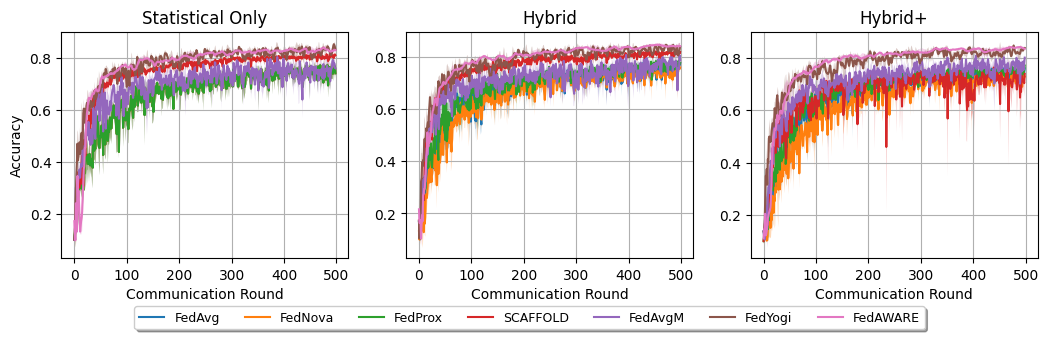

In [6]:
# dirchlet
key = "Test/accuracy/fmnist"
plt.figure(figsize = (12.6, 3), dpi=100)
smt = 0

fedavgs = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-10:40:05/events.out.tfevents.1684377605.hit-v1.2101809.0",
           "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-13:57:29/events.out.tfevents.1684389449.hit-v1.2476653.0",
           "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-09:12:08/events.out.tfevents.1684372328.hit-v1.1959836.0"
           ]

fedavgms = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-10:40:05/events.out.tfevents.1684377605.hit-v1.2101810.0",
            "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-18:03:38/events.out.tfevents.1684404218.hit-v1.2792064.0",
            "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-09:12:08/events.out.tfevents.1684372328.hit-v1.1959837.0"
            ]

fednovas = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-18-13:57:29/events.out.tfevents.1684389449.hit-v1.2476650.0",
            "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-18-18:03:38/events.out.tfevents.1684404218.hit-v1.2792067.0",
            "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-18-10:40:05/events.out.tfevents.1684377605.hit-v1.2101807.0"
            ]

fedyogis = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-18-13:57:29/events.out.tfevents.1684389450.hit-v1.2476651.0",
            "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-18-18:03:38/events.out.tfevents.1684404218.hit-v1.2792068.0",
            "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-18-09:12:08/events.out.tfevents.1684372328.hit-v1.1959838.0"]

fedproxs = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-18-13:57:30/events.out.tfevents.1684389450.hit-v1.2476648.0",
            "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-18-18:03:38/events.out.tfevents.1684404218.hit-v1.2792065.0",
            "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-18-09:12:08/events.out.tfevents.1684372328.hit-v1.1959839.0"
            ]

scaffolds = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-18-13:57:29/events.out.tfevents.1684389449.hit-v1.2476649.0",
             "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-18-18:03:38/events.out.tfevents.1684404218.hit-v1.2792066.0",
             "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-18-10:40:05/events.out.tfevents.1684377605.hit-v1.2101806.0"
             ]

ours = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-10:40:05/events.out.tfevents.1684377605.hit-v1.2101808.0",
        "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-13:57:29/events.out.tfevents.1684389449.hit-v1.2476652.0",
        "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-09:12:08/events.out.tfevents.1684372328.hit-v1.1959835.0"]

logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax = plt.subplot(1,3,1)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("statistical - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))
    
ax.grid()
ax.set_title("Statistical Only")
#ax.set_ylim(0.4, 1)
ax.set_xlabel("Communication Round")
ax.set_ylabel("Accuracy")
# ax.legend()


#fig 2 

fedavgs = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-17:19:25/events.out.tfevents.1684401565.hit-v1.2741178.0",
           "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-23:51:31/events.out.tfevents.1684425091.hit-v1.3331932.0",
           "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-12:39:00/events.out.tfevents.1684384740.hit-v1.2368691.0"
           ]

fedavgms = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-20:40:14/events.out.tfevents.1684413614.hit-v1.2978715.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-23:51:31/events.out.tfevents.1684425091.hit-v1.3331933.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-12:39:00/events.out.tfevents.1684384740.hit-v1.2368692.0"
            ]

fednovas = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-18-20:40:14/events.out.tfevents.1684413614.hit-v1.2978718.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-19-02:29:59/events.out.tfevents.1684434599.hit-v1.3521886.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-18-17:19:25/events.out.tfevents.1684401565.hit-v1.2741175.0"
            ]

fedyogis = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-18-20:40:14/events.out.tfevents.1684413614.hit-v1.2978719.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-19-02:29:59/events.out.tfevents.1684434599.hit-v1.3521887.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-18-17:19:25/events.out.tfevents.1684401565.hit-v1.2741176.0"]

fedproxs = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-18-20:40:14/events.out.tfevents.1684413614.hit-v1.2978716.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-19-02:29:59/events.out.tfevents.1684434599.hit-v1.3521884.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-18-12:39:00/events.out.tfevents.1684384740.hit-v1.2368693.0"
            ]

scaffolds = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-18-20:40:14/events.out.tfevents.1684413614.hit-v1.2978717.0",
             "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-19-02:29:59/events.out.tfevents.1684434599.hit-v1.3521885.0",
             "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-18-12:39:00/events.out.tfevents.1684384740.hit-v1.2368694.0"
             ]

ours = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-17:19:25/events.out.tfevents.1684401565.hit-v1.2741177.0",
        "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-23:51:31/events.out.tfevents.1684425091.hit-v1.3331931.0",
        "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-12:39:00/events.out.tfevents.1684384740.hit-v1.2368690.0"]

logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax2 = plt.subplot(1,3,2)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax2.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax2.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("hybrid - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))

ax2.grid()
ax2.set_title("Hybrid")
#ax2.set_ylim(0.4, 1)
ax2.set_xlabel("Communication Round")
#ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower center", bbox_to_anchor=(0.43, -0.34), fancybox=True, ncol=7, shadow=True, prop={"size":9})
# fig 3

fedavgs = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-19-00:54:41/events.out.tfevents.1684428881.hit-v1.3404311.0",
           "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-19-05:46:11/events.out.tfevents.1684446371.hit-v1.3763581.0",
           "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-18-21:40:01/events.out.tfevents.1684417201.hit-v1.3094116.0"
           ]

fedavgms = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-19-03:45:52/events.out.tfevents.1684439152.hit-v1.3617110.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-19-05:46:11/events.out.tfevents.1684446371.hit-v1.3763582.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-21:40:01/events.out.tfevents.1684417201.hit-v1.3094117.0"
            ]

fednovas = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-19-03:45:52/events.out.tfevents.1684439152.hit-v1.3617113.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-19-07:01:59/events.out.tfevents.1684450919.hit-v1.3863419.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-19-00:54:41/events.out.tfevents.1684428881.hit-v1.3404308.0"
            ]

fedyogis = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-19-03:45:52/events.out.tfevents.1684439152.hit-v1.3617114.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-19-07:01:59/events.out.tfevents.1684450919.hit-v1.3863420.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-19-00:54:41/events.out.tfevents.1684428881.hit-v1.3404309.0"]

fedproxs = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-19-03:45:53/events.out.tfevents.1684439153.hit-v1.3617111.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-19-07:01:59/events.out.tfevents.1684450919.hit-v1.3863417.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-18-21:40:01/events.out.tfevents.1684417201.hit-v1.3094118.0"
            ]

scaffolds = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-19-03:45:52/events.out.tfevents.1684439152.hit-v1.3617112.0",
             "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-19-07:01:59/events.out.tfevents.1684450919.hit-v1.3863418.0",
             "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-18-21:40:01/events.out.tfevents.1684417201.hit-v1.3094119.0"
             ]

ours = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-19-00:54:41/events.out.tfevents.1684428881.hit-v1.3404310.0",
        "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-19-05:46:11/events.out.tfevents.1684446371.hit-v1.3763580.0",
        "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-21:40:01/events.out.tfevents.1684417201.hit-v1.3094115.0"]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax3 = plt.subplot(1,3,3)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax3.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax3.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("hybrid+ - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))
ax3.grid()
# ax3.set_ylim(0.4, 1)
ax3.set_xlabel("Communication Round")
#ax3.set_ylabel("Accuracy")
ax3.set_title("Hybrid+")
# ax3.legend()

#plt.tight_layout()
plt.savefig("./figures/accuracy_fmnist.pdf", bbox_inches='tight')

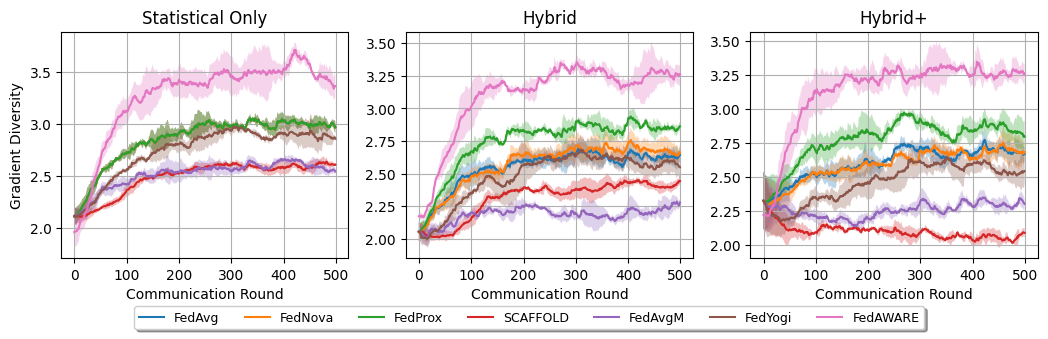

In [7]:
# dirchlet
key = "Metric/Diversity/fmnist"
plt.figure(figsize = (12.6, 3), dpi=100)
smt = 0.98

fedavgs = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-10:40:05/events.out.tfevents.1684377605.hit-v1.2101809.0",
           "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-13:57:29/events.out.tfevents.1684389449.hit-v1.2476653.0",
           "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-09:12:08/events.out.tfevents.1684372328.hit-v1.1959836.0"
           ]

fedavgms = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-10:40:05/events.out.tfevents.1684377605.hit-v1.2101810.0",
            "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-18:03:38/events.out.tfevents.1684404218.hit-v1.2792064.0",
            "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-09:12:08/events.out.tfevents.1684372328.hit-v1.1959837.0"
            ]

fednovas = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-18-13:57:29/events.out.tfevents.1684389449.hit-v1.2476650.0",
            "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-18-18:03:38/events.out.tfevents.1684404218.hit-v1.2792067.0",
            "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-18-10:40:05/events.out.tfevents.1684377605.hit-v1.2101807.0"
            ]

fedyogis = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-18-13:57:29/events.out.tfevents.1684389450.hit-v1.2476651.0",
            "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-18-18:03:38/events.out.tfevents.1684404218.hit-v1.2792068.0",
            "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-18-09:12:08/events.out.tfevents.1684372328.hit-v1.1959838.0"]

fedproxs = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-18-13:57:30/events.out.tfevents.1684389450.hit-v1.2476648.0",
            "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-18-18:03:38/events.out.tfevents.1684404218.hit-v1.2792065.0",
            "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-18-09:12:08/events.out.tfevents.1684372328.hit-v1.1959839.0"
            ]

scaffolds = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-18-13:57:29/events.out.tfevents.1684389449.hit-v1.2476649.0",
             "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-18-18:03:38/events.out.tfevents.1684404218.hit-v1.2792066.0",
             "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-18-10:40:05/events.out.tfevents.1684377605.hit-v1.2101806.0"
             ]

ours = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-10:40:05/events.out.tfevents.1684377605.hit-v1.2101808.0",
        "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-13:57:29/events.out.tfevents.1684389449.hit-v1.2476652.0",
        "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-09:12:08/events.out.tfevents.1684372328.hit-v1.1959835.0"]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax = plt.subplot(1,3,1)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt) for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
ax.grid()
ax.set_title("Statistical Only")
# ax.set_ylim(0.08, 0.65)
ax.set_xlabel("Communication Round")
ax.set_ylabel("Gradient Diversity")
# ax.legend()


#fig 2 
fedavgs = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-17:19:25/events.out.tfevents.1684401565.hit-v1.2741178.0",
           "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-23:51:31/events.out.tfevents.1684425091.hit-v1.3331932.0",
           "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-12:39:00/events.out.tfevents.1684384740.hit-v1.2368691.0"
           ]

fedavgms = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-20:40:14/events.out.tfevents.1684413614.hit-v1.2978715.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-23:51:31/events.out.tfevents.1684425091.hit-v1.3331933.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-12:39:00/events.out.tfevents.1684384740.hit-v1.2368692.0"
            ]

fednovas = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-18-20:40:14/events.out.tfevents.1684413614.hit-v1.2978718.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-19-02:29:59/events.out.tfevents.1684434599.hit-v1.3521886.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-18-17:19:25/events.out.tfevents.1684401565.hit-v1.2741175.0"
            ]

fedyogis = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-18-20:40:14/events.out.tfevents.1684413614.hit-v1.2978719.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-19-02:29:59/events.out.tfevents.1684434599.hit-v1.3521887.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-18-17:19:25/events.out.tfevents.1684401565.hit-v1.2741176.0"]

fedproxs = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-18-20:40:14/events.out.tfevents.1684413614.hit-v1.2978716.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-19-02:29:59/events.out.tfevents.1684434599.hit-v1.3521884.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-18-12:39:00/events.out.tfevents.1684384740.hit-v1.2368693.0"
            ]

scaffolds = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-18-20:40:14/events.out.tfevents.1684413614.hit-v1.2978717.0",
             "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-19-02:29:59/events.out.tfevents.1684434599.hit-v1.3521885.0",
             "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-18-12:39:00/events.out.tfevents.1684384740.hit-v1.2368694.0"
             ]

ours = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-17:19:25/events.out.tfevents.1684401565.hit-v1.2741177.0",
        "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-23:51:31/events.out.tfevents.1684425091.hit-v1.3331931.0",
        "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-12:39:00/events.out.tfevents.1684384740.hit-v1.2368690.0"]



logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax2 = plt.subplot(1,3,2)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt) for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax2.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax2.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
ax2.grid()
ax2.set_title("Hybrid")
# ax2.set_ylim(0.08, 0.65)
ax2.set_xlabel("Communication Round")
#ax2.set_ylabel("Gradient Diversity")
ax2.legend(loc="lower center", bbox_to_anchor=(0.43, -0.34), fancybox=True, ncol=7, shadow=True, prop={"size":9})
# fig 3

fedavgs = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-19-00:54:41/events.out.tfevents.1684428881.hit-v1.3404311.0",
           "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-19-05:46:11/events.out.tfevents.1684446371.hit-v1.3763581.0",
           "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-18-21:40:01/events.out.tfevents.1684417201.hit-v1.3094116.0"
           ]

fedavgms = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-19-03:45:52/events.out.tfevents.1684439152.hit-v1.3617110.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-19-05:46:11/events.out.tfevents.1684446371.hit-v1.3763582.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-21:40:01/events.out.tfevents.1684417201.hit-v1.3094117.0"
            ]

fednovas = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-19-03:45:52/events.out.tfevents.1684439152.hit-v1.3617113.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-19-07:01:59/events.out.tfevents.1684450919.hit-v1.3863419.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-19-00:54:41/events.out.tfevents.1684428881.hit-v1.3404308.0"
            ]

fedyogis = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-19-03:45:52/events.out.tfevents.1684439152.hit-v1.3617114.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-19-07:01:59/events.out.tfevents.1684450919.hit-v1.3863420.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-19-00:54:41/events.out.tfevents.1684428881.hit-v1.3404309.0"]

fedproxs = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-19-03:45:53/events.out.tfevents.1684439153.hit-v1.3617111.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-19-07:01:59/events.out.tfevents.1684450919.hit-v1.3863417.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-18-21:40:01/events.out.tfevents.1684417201.hit-v1.3094118.0"
            ]

scaffolds = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-19-03:45:52/events.out.tfevents.1684439152.hit-v1.3617112.0",
             "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-19-07:01:59/events.out.tfevents.1684450919.hit-v1.3863418.0",
             "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-18-21:40:01/events.out.tfevents.1684417201.hit-v1.3094119.0"
             ]

ours = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-19-00:54:41/events.out.tfevents.1684428881.hit-v1.3404310.0",
        "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-19-05:46:11/events.out.tfevents.1684446371.hit-v1.3763580.0",
        "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-21:40:01/events.out.tfevents.1684417201.hit-v1.3094115.0"]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax3 = plt.subplot(1,3,3)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt) for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax3.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax3.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
ax3.grid()
# ax3.set_ylim(0.08, 0.65)
ax3.set_xlabel("Communication Round")
#ax3.set_ylabel("Gradient Diversity")
ax3.set_title("Hybrid+")
# ax3.legend()

#plt.tight_layout()
plt.savefig("./figures/diversity_fmnist.pdf", bbox_inches='tight')

statistical - FedAvg - acc 1.8317 - std 0.0677
statistical - FedNova - acc 1.8317 - std 0.0677
statistical - FedProx - acc 1.8325 - std 0.0676
statistical - SCAFFOLD - acc 1.8317 - std 0.0677
statistical - FedAvgM - acc 1.8317 - std 0.0677
statistical - FedYogi - acc 1.8317 - std 0.0677
statistical - FedAWARE - acc 1.8749 - std 0.0289
hybrid - FedAvg - acc 1.5231 - std 0.0779
hybrid - FedNova - acc 1.5976 - std 0.0372
hybrid - FedProx - acc 1.5158 - std 0.0842
hybrid - SCAFFOLD - acc 1.5475 - std 0.0735
hybrid - FedAvgM - acc 1.5231 - std 0.0779
hybrid - FedYogi - acc 1.4915 - std 0.0934
hybrid - FedAWARE - acc 1.5822 - std 0.1899
hybrid+ - FedAvg - acc 2.0678 - std 0.1442
hybrid+ - FedNova - acc 2.1273 - std 0.0792
hybrid+ - FedProx - acc 2.0671 - std 0.1390
hybrid+ - SCAFFOLD - acc 2.3534 - std 0.3943
hybrid+ - FedAvgM - acc 2.0678 - std 0.1442
hybrid+ - FedYogi - acc 2.0281 - std 0.1202
hybrid+ - FedAWARE - acc 2.0259 - std 0.0910


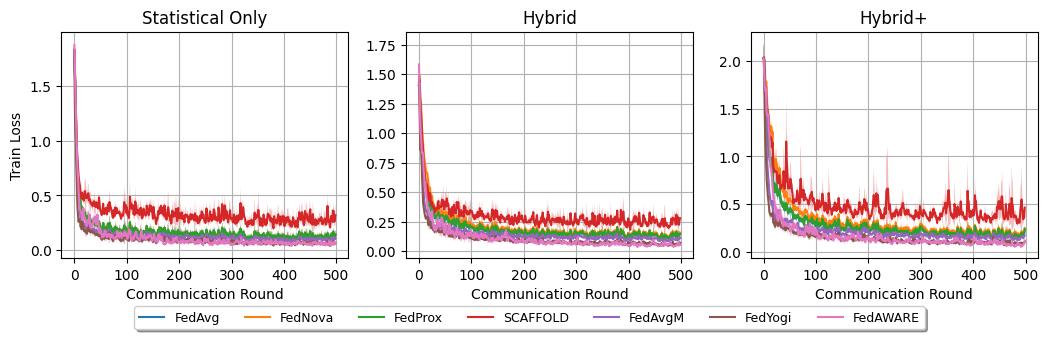

In [9]:
# dirchlet
key = "Train/loss/fmnist"
plt.figure(figsize = (12.6, 3), dpi=100)
smt = 0.5

fedavgs = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-10:40:05/events.out.tfevents.1684377605.hit-v1.2101809.0",
           "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-13:57:29/events.out.tfevents.1684389449.hit-v1.2476653.0",
           "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-09:12:08/events.out.tfevents.1684372328.hit-v1.1959836.0"
           ]

fedavgms = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-10:40:05/events.out.tfevents.1684377605.hit-v1.2101810.0",
            "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-18:03:38/events.out.tfevents.1684404218.hit-v1.2792064.0",
            "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-09:12:08/events.out.tfevents.1684372328.hit-v1.1959837.0"
            ]

fednovas = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-18-13:57:29/events.out.tfevents.1684389449.hit-v1.2476650.0",
            "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-18-18:03:38/events.out.tfevents.1684404218.hit-v1.2792067.0",
            "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-18-10:40:05/events.out.tfevents.1684377605.hit-v1.2101807.0"
            ]

fedyogis = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-18-13:57:29/events.out.tfevents.1684389450.hit-v1.2476651.0",
            "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-18-18:03:38/events.out.tfevents.1684404218.hit-v1.2792068.0",
            "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-18-09:12:08/events.out.tfevents.1684372328.hit-v1.1959838.0"]

fedproxs = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-18-13:57:30/events.out.tfevents.1684389450.hit-v1.2476648.0",
            "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-18-18:03:38/events.out.tfevents.1684404218.hit-v1.2792065.0",
            "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.01_05-18-09:12:08/events.out.tfevents.1684372328.hit-v1.1959839.0"
            ]

scaffolds = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-18-13:57:29/events.out.tfevents.1684389449.hit-v1.2476649.0",
             "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-18-18:03:38/events.out.tfevents.1684404218.hit-v1.2792066.0",
             "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-18-10:40:05/events.out.tfevents.1684377605.hit-v1.2101806.0"
             ]

ours = ["logs/fmnist_pathological_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-10:40:05/events.out.tfevents.1684377605.hit-v1.2101808.0",
        "logs/fmnist_pathological_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-13:57:29/events.out.tfevents.1684389449.hit-v1.2476652.0",
        "logs/fmnist_pathological_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-09:12:08/events.out.tfevents.1684372328.hit-v1.1959835.0"]

logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax = plt.subplot(1,3,1)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)

    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("statistical - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))
    
ax.grid()
ax.set_title("Statistical Only")
# ax.set_ylim(0.4, 1)
ax.set_xlabel("Communication Round")
ax.set_ylabel("Train Loss")
# ax.legend()


#fig 2 
fedavgs = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-17:19:25/events.out.tfevents.1684401565.hit-v1.2741178.0",
           "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-23:51:31/events.out.tfevents.1684425091.hit-v1.3331932.0",
           "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavg_GLR1.0_05-18-12:39:00/events.out.tfevents.1684384740.hit-v1.2368691.0"
           ]

fedavgms = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-20:40:14/events.out.tfevents.1684413614.hit-v1.2978715.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-23:51:31/events.out.tfevents.1684425091.hit-v1.3331933.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-12:39:00/events.out.tfevents.1684384740.hit-v1.2368692.0"
            ]

fednovas = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-18-20:40:14/events.out.tfevents.1684413614.hit-v1.2978718.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-19-02:29:59/events.out.tfevents.1684434599.hit-v1.3521886.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fednova_GLR1.0_05-18-17:19:25/events.out.tfevents.1684401565.hit-v1.2741175.0"
            ]

fedyogis = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-18-20:40:14/events.out.tfevents.1684413614.hit-v1.2978719.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-19-02:29:59/events.out.tfevents.1684434599.hit-v1.3521887.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedopt_GLR0.01_yogi_05-18-17:19:25/events.out.tfevents.1684401565.hit-v1.2741176.0"]

fedproxs = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-18-20:40:14/events.out.tfevents.1684413614.hit-v1.2978716.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-19-02:29:59/events.out.tfevents.1684434599.hit-v1.3521884.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_fedprox_GLR1.0_mu0.1_05-18-12:39:00/events.out.tfevents.1684384740.hit-v1.2368693.0"
            ]

scaffolds = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-18-20:40:14/events.out.tfevents.1684413614.hit-v1.2978717.0",
             "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-19-02:29:59/events.out.tfevents.1684434599.hit-v1.3521885.0",
             "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_scaffold_GLR1.0_05-18-12:39:00/events.out.tfevents.1684384740.hit-v1.2368694.0"
             ]

ours = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-17:19:25/events.out.tfevents.1684401565.hit-v1.2741177.0",
        "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-23:51:31/events.out.tfevents.1684425091.hit-v1.3331931.0",
        "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BS64_EP3_LLR0.01_K10_T500_H0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-12:39:00/events.out.tfevents.1684384740.hit-v1.2368690.0"]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax2 = plt.subplot(1,3,2)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax2.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax2.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("hybrid - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))

ax2.grid()
ax2.set_title("Hybrid")
#ax2.set_ylim(0.4, 1)
ax2.set_xlabel("Communication Round")
#ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower center", bbox_to_anchor=(0.43, -0.34), fancybox=True, ncol=7, shadow=True, prop={"size":9})
# fig 3

fedavgs = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-19-00:54:41/events.out.tfevents.1684428881.hit-v1.3404311.0",
           "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-19-05:46:11/events.out.tfevents.1684446371.hit-v1.3763581.0",
           "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavg_GLR1.0_05-18-21:40:01/events.out.tfevents.1684417201.hit-v1.3094116.0"
           ]

fedavgms = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-19-03:45:52/events.out.tfevents.1684439152.hit-v1.3617110.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-19-05:46:11/events.out.tfevents.1684446371.hit-v1.3763582.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedavgm_GLR1.0_momentum0.7_05-18-21:40:01/events.out.tfevents.1684417201.hit-v1.3094117.0"
            ]

fednovas = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-19-03:45:52/events.out.tfevents.1684439152.hit-v1.3617113.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-19-07:01:59/events.out.tfevents.1684450919.hit-v1.3863419.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fednova_GLR1.0_05-19-00:54:41/events.out.tfevents.1684428881.hit-v1.3404308.0"
            ]

fedyogis = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-19-03:45:52/events.out.tfevents.1684439152.hit-v1.3617114.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-19-07:01:59/events.out.tfevents.1684450919.hit-v1.3863420.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedopt_GLR0.01_yogi_05-19-00:54:41/events.out.tfevents.1684428881.hit-v1.3404309.0"]

fedproxs = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-19-03:45:53/events.out.tfevents.1684439153.hit-v1.3617111.0",
            "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-19-07:01:59/events.out.tfevents.1684450919.hit-v1.3863417.0",
            "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_fedprox_GLR1.0_mu0.1_05-18-21:40:01/events.out.tfevents.1684417201.hit-v1.3094118.0"
            ]

scaffolds = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-19-03:45:52/events.out.tfevents.1684439152.hit-v1.3617112.0",
             "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-19-07:01:59/events.out.tfevents.1684450919.hit-v1.3863418.0",
             "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_scaffold_GLR1.0_05-18-21:40:01/events.out.tfevents.1684417201.hit-v1.3094119.0"
             ]

ours = ["logs/fmnist_dirichlet_0.1_2023/Run37_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-19-00:54:41/events.out.tfevents.1684428881.hit-v1.3404310.0",
        "logs/fmnist_dirichlet_0.1_2023/Run73_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-19-05:46:11/events.out.tfevents.1684446371.hit-v1.3763580.0",
        "logs/fmnist_dirichlet_0.1_2023/Run1998_N100_BSNone_EPNone_LLR0.01_K10_T500_H1.0/Setting_ours_GLR1.0_clipping1.0-1.0_momentum0.3_startup0_05-18-21:40:01/events.out.tfevents.1684417201.hit-v1.3094115.0"]


logs = {"FedAvg":fedavgs, "FedNova":fednovas, "FedProx":fedproxs, "SCAFFOLD": scaffolds, "FedAvgM":fedavgms, "FedYogi":fedyogis,  "FedAWARE":ours}

ax3 = plt.subplot(1,3,3)
for name, log in logs.items():
    data = [smooth(read_event(et, key), smt)[0:499] for et in log]
    mean_data = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    ax3.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50)
    ax3.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3)
#     plt.plot(np.arange(len(mean_data)), mean_data, label=name, markevery=50, linestyle=stl, color=col)
#     plt.fill_between(np.arange(len(mean_data)), mean_data - std, mean_data + std, alpha=0.3, color=col)
    raw_data = [max(read_event(et, key)) for et in log]
    acc_mean = np.mean(raw_data, axis=0)
    acc_std = np.std(raw_data, axis=0)
    print("hybrid+ - {} - acc {:.4f} - std {:.4f}".format(name, acc_mean, acc_std))
ax3.grid()
# ax3.set_ylim(0.4, 1)
ax3.set_xlabel("Communication Round")
#ax3.set_ylabel("Accuracy")
ax3.set_title("Hybrid+")
# ax3.legend()

#plt.tight_layout()
plt.savefig("./figures/trainloss_fmnist.pdf", bbox_inches='tight')